In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
import numpy as np
import collections, numpy
import seaborn as sns 
import scipy.stats
from sklearn import preprocessing
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.stats import ks_2samp
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import datetime
from collections import Counter
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("dataTop141920.csv")
df = df[['Date', 'Match', 'Equipe', 'domicile', 'Points',
       'Victoire', 'BR_Carries', 'BR_Defenders Beaten', 'BR_Meters',
       'BR_Missed Tackles', 'BR_Offloads', 'BR_Pens Con', 'BR_Tackles',
       'B_Carries', 'B_Defenders Beaten', 'B_Meters', 'B_Missed Tackles',
       'B_Offloads', 'B_Pens Con', 'B_Tackles', 'Carries ', 'Clean Breaks',
       'Conversions', 'Defenders Beaten', 'F5_Carries', 'F5_Defenders Beaten',
       'F5_Meters', 'F5_Missed Tackles', 'F5_Offloads', 'F5_Pens Con',
       'F5_Tackles', 'Kicks In Play', 'Metres', 'Missed Tackles', 'Offloads',
       'Passes', 'Penalty Goal', 'Pens Def', 'Pens Off', 'Tackles',
       'Throws Lost', 'Throws Won', 'Tries', 'Turnovers Con', 'Turnovers Won',
       'Scrum', 'Ratio_Srum', 'Ratio_LineOut', 'Rucks', 'Ratio_Rucks',
       'time_possession', 'temps_de_jeu_effectifs',
       'nb participation au ruck off', 'nb participation au ruck def',
       'efficacite participant au ruck', 'pen cons dans son camp',
       'ratio transfo']]
df.columns =[["date","match","equipe","domicile","points","victoire","tl_porte",
              "tl_defenseurs_battus","tl_metres","tl_plaquages_manques","tl_passe_apres_contact",
              "tl_pen_cons","tl_plaquages","tq_porte","tq_defenseurs_battus","tq_metres",
              "tq_plaquages_manques","tq_passe_apres_contact","tq_pen_cons","tq_plaquages",
              "balles_porte","franchissement","transformation","defenseurs_battus","cdd_porte",
              "cdd_defenseurs_battus","cdd_metres","cdd_plaquages_manques","cdd_passe_apres_contact",
              "cdd_pen_cons","cdd_plaquages","jeu_au_pied","metres","palquages_manques",
              "passes_apres_contact","passes","penalite_transfo","pen_def","pen_off",
              "plaquages","lance_perdu","lance_gagne","essais","turnover_cons","turnover_acquis",
              "melee","ratio_melee","ratio_touche","rucks","ratio_rucks","temps_possession",
             "temps_jeu_eff","nb_paricipant_ruck_off","nb_participant_ruck_def",
              "efficacite_participant_ruck","pen_cons_dans_son_camp","ratio_transfo"]]
df.to_csv('test.csv')
df = pd.read_csv('test.csv',index_col = 0)
df.loc[161,"ratio_melee"]=0.5

In [7]:
df.groupby("match").agg("count").shape

(119, 56)

# conversion en seconde 

In [226]:
def convert_s (time_string):
    date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

In [227]:
df["temps_possession_s"] = df["temps_possession"].apply(convert_s)
df["temps_jeu_eff_s"] = df["temps_jeu_eff"].apply(convert_s)

In [228]:
df = df[["date","match","equipe","domicile","points","victoire","tl_porte",
              "tl_defenseurs_battus","tl_metres","tl_plaquages_manques","tl_passe_apres_contact",
              "tl_pen_cons","tl_plaquages","tq_porte","tq_defenseurs_battus","tq_metres",
              "tq_plaquages_manques","tq_passe_apres_contact","tq_pen_cons","tq_plaquages",
              "balles_porte","franchissement","transformation","defenseurs_battus","cdd_porte",
              "cdd_defenseurs_battus","cdd_metres","cdd_plaquages_manques","cdd_passe_apres_contact",
              "cdd_pen_cons","cdd_plaquages","jeu_au_pied","metres","palquages_manques",
              "passes_apres_contact","passes","penalite_transfo","pen_def","pen_off",
              "plaquages","lance_perdu","lance_gagne","essais","turnover_cons","turnover_acquis",
              "melee","ratio_melee","ratio_touche","rucks","ratio_rucks","temps_possession_s",
             "temps_jeu_eff_s","nb_paricipant_ruck_off","nb_participant_ruck_def",
              "efficacite_participant_ruck","pen_cons_dans_son_camp","ratio_transfo"]]
df.replace({"Agen":"SUA","Toulon":"RCT","Bordeaux Begles":"UBB", 'Toulouse':"ST", 'Castres':"CA",
       'Montpellier':"MHR", 'Clermont Auvergne':"ASM", 'La Rochelle':"SR", 'Lyon':"LOU",
       'Stade Francais':"SF", 'Pau':"SP", 'Brive':"CAB", 'Racing 92':"R92", 'Bayonne':"AB"},inplace =True)

In [229]:
df.head()

,date,match,equipe,domicile,points,victoire,tl_porte,tl_defenseurs_battus,tl_metres,tl_plaquages_manques,tl_passe_apres_contact,tl_pen_cons,tl_plaquages,tq_porte,tq_defenseurs_battus,tq_metres,tq_plaquages_manques,tq_passe_apres_contact,tq_pen_cons,tq_plaquages,balles_porte,franchissement,transformation,defenseurs_battus,cdd_porte,cdd_defenseurs_battus,cdd_metres,cdd_plaquages_manques,cdd_passe_apres_contact,cdd_pen_cons,cdd_plaquages,jeu_au_pied,metres,palquages_manques,passes_apres_contact,passes,penalite_transfo,pen_def,pen_off,plaquages,lance_perdu,lance_gagne,essais,turnover_cons,turnover_acquis,melee,ratio_melee,ratio_touche,rucks,ratio_rucks,temps_possession_s,temps_jeu_eff_s,nb_paricipant_ruck_off,nb_participant_ruck_def,efficacite_participant_ruck,pen_cons_dans_son_camp,ratio_transfo
0,24/08/19,Agen-Toulon,SUA,1,25,0,19,1,39,4,1,3,27,50,7,202,17,4,1,40,83,8,2,11,14,3,15,5,0,10,31,12,256,26,5,93,2,10,4,109,0,12,3,11,0,3,1.00,1.00,47,0.94,631.0,1634.0,112,47,0.87,11,0.67
1,24/08/19,Agen-Toulon,RCT,0,44,1,15,1,34,1,0,1,19,58,22,274,6,5,3,25,103,13,4,26,30,3,48,4,2,2,24,20,356,11,7,127,2,6,1,74,2,8,6,10,8,9,1.00,0.80,67,1.00,1003.0,1634.0,171,30,0.95,4,0.67
2,24/08/19,Bordeaux Begles-Toulouse,UBB,1,30,1,12,0,28,6,1,2,28,51,10,267,10,3,3,30,95,10,3,14,32,4,37,4,0,5,52,21,332,20,4,104,3,10,2,120,3,6,3,12,3,5,0.80,0.67,77,0.97,874.0,1845.0,203,44,0.96,8,0.75
3,24/08/19,Bordeaux Begles-Toulouse,ST,0,25,0,29,8,89,3,4,2,27,42,9,229,5,3,1,31,100,8,0,20,29,3,21,6,1,7,51,20,339,14,8,116,5,8,2,115,1,12,2,12,4,6,0.67,0.92,73,0.99,971.0,1845.0,169,25,0.90,4,0.71
4,24/08/19,Castres-Montpellier,CA,1,26,1,22,3,60,6,4,4,32,37,8,156,7,6,4,27,85,3,0,13,26,2,36,8,0,5,34,20,252,21,10,93,7,7,6,114,3,6,1,10,5,9,0.67,0.67,68,1.00,816.0,1607.0,153,37,0.97,6,0.88


# preparation du df relatif

In [230]:
d={}
diffindex ={}
diffOne={}
diffTwo={}
diffens={}
diffensind = {}
dfrela= pd.DataFrame()
for i in df.match.unique():
    d[i] = df[df["match"]==i]
    diffindex[i] = d[i][["date","match","equipe","victoire","domicile"]]
    diffOne[i] = d[i].drop(["date","match","equipe","victoire","domicile"],axis= 1).diff().dropna()
    diffTwo[i] = d[i].drop(["date","match","equipe","victoire","domicile"],axis= 1).diff(periods=-1).dropna()
    diffens[i] = pd.concat([diffOne[i],diffTwo[i]])
    diffensind[i] = pd.concat([diffindex[i],diffens[i]],axis=1)
    dfrela = pd.concat([dfrela,diffensind[i]])

# Type d'équipe (factuel)

In [232]:
df_type = df[["equipe","tl_porte",'tq_porte','cdd_porte','jeu_au_pied','metres','passes_apres_contact','passes','plaquages','rucks','temps_possession_s','nb_paricipant_ruck_off',"nb_participant_ruck_def","balles_porte"]]

In [233]:
df_type.head()

,equipe,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte
0,SUA,19,50,14,12,256,5,93,109,47,631.0,112,47,83
1,RCT,15,58,30,20,356,7,127,74,67,1003.0,171,30,103
2,UBB,12,51,32,21,332,4,104,120,77,874.0,203,44,95
3,ST,29,42,29,20,339,8,116,115,73,971.0,169,25,100
4,CA,22,37,26,20,252,10,93,114,68,816.0,153,37,85


## groupby Equipe mean

In [234]:
df_type_mean = df_type.groupby("equipe").mean()
df_type_mean


,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte
equipe,,,,,,,,,,,,,
AB,27.941176,50.529412,36.117647,21.000000,350.705882,9.823529,112.294118,135.352941,85.647059,1030.294118,193.117647,48.058824,114.588235
ASM,23.882353,51.823529,32.764706,18.235294,371.470588,5.411765,128.882353,112.294118,82.705882,980.352941,212.000000,57.588235,108.470588
CA,26.352941,47.235294,30.117647,20.176471,334.411765,8.941176,113.235294,136.529412,76.941176,957.941176,178.764706,46.058824,103.705882
CAB,25.647059,46.529412,31.176471,18.941176,355.176471,6.058824,110.235294,143.176471,77.176471,937.058824,189.235294,54.000000,103.352941
LOU,27.647059,53.588235,33.823529,22.647059,397.294118,11.647059,131.705882,124.764706,78.352941,1022.882353,182.235294,54.235294,115.058824
MHR,23.235294,51.529412,30.764706,18.941176,365.941176,10.058824,126.058824,128.411765,74.705882,931.705882,175.352941,51.823529,105.529412
R92,22.941176,51.705882,38.470588,23.941176,405.000000,5.411765,136.823529,140.000000,82.823529,1010.411765,198.882353,51.352941,113.117647
RCT,21.529412,47.764706,30.058824,19.294118,340.588235,7.294118,117.705882,125.176471,73.823529,972.529412,175.588235,42.058824,99.352941
SF,26.000000,47.000000,30.941176,18.764706,323.058824,7.352941,120.235294,137.235294,80.058824,944.647059,196.117647,55.176471,103.941176


## Centrage et réduction

In [235]:
#préparation données ACP

X = df_type_mean.values
names = df_type_mean.index
features = df_type_mean.columns

#centrage et réduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [236]:
df_type_mean_red = pd.DataFrame(X_scaled, columns = features, index = names )
df_type_mean_red

,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte
equipe,,,,,,,,,,,,,
AB,0.994791,0.038071,0.679747,0.340348,-0.340231,0.952222,-1.366844,0.357093,1.099507,1.208721,0.146437,-0.097915,0.844830
ASM,-0.428865,0.363788,-0.396519,-1.259286,0.269643,-1.591882,0.400696,-1.810745,0.446704,0.008081,1.526075,1.610320,-0.168409
CA,0.437708,-0.791027,-1.246202,-0.136139,-0.818801,0.443401,-1.266558,0.467697,-0.832790,-0.530722,-0.902260,-0.456433,-0.957566
CAB,0.190116,-0.968690,-0.906329,-0.850869,-0.208927,-1.218747,-1.586220,1.092609,-0.780566,-1.032757,-0.137227,0.967096,-1.016023
LOU,0.891628,0.807947,-0.056646,1.293321,1.028098,2.003784,0.701554,-0.638343,-0.519445,1.030534,-0.648682,1.009274,0.922771
MHR,-0.655825,0.289761,-1.038502,-0.850869,0.107240,1.087907,0.099838,-0.295471,-1.328920,-1.161447,-1.151540,0.576943,-0.655543
R92,-0.758989,0.334177,1.435021,2.042086,1.254425,-1.591882,1.246859,0.793978,0.472816,0.730728,0.567635,0.492586,0.601263
RCT,-1.254174,-0.657779,-1.265084,-0.646660,-0.637394,-0.506398,-0.790200,-0.599631,-1.524761,-0.180005,-1.134348,-1.173470,-1.678525
SF,0.313912,-0.850248,-0.981856,-0.952973,-1.152245,-0.472476,-0.520681,0.534059,-0.140819,-0.850327,0.365632,1.177989,-0.918596


## Clustering 

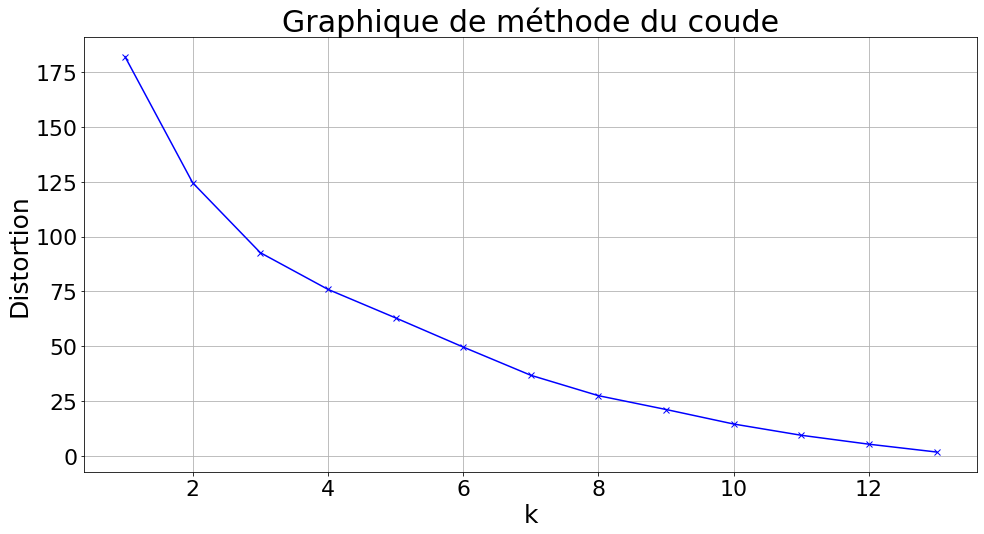

In [237]:
#détermination du  nombre de cluster (méthode du coude)
# détermination 
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)
    
# graphique de distortion
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k',fontsize = 25)
plt.ylabel('Distortion',fontsize = 25)
plt.title('Graphique de méthode du coude', fontsize = 30)
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)

plt.grid()

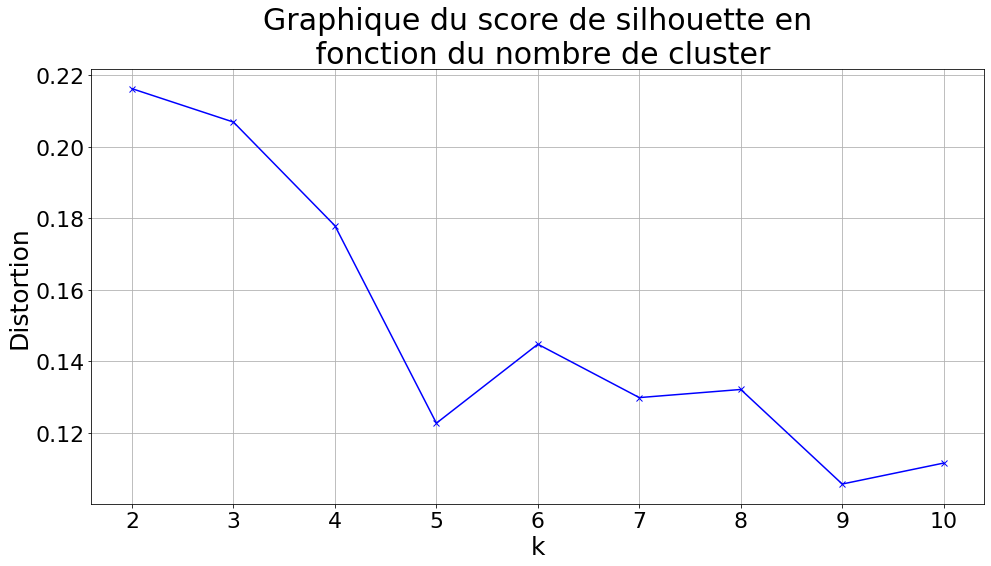

In [238]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))

# graphique de distortion
plt.figure(figsize=(16,8))
plt.plot(range(2, kmax+1), sil, 'bx-')
plt.xlabel('k',fontsize = 25)
plt.ylabel('Distortion',fontsize = 25)
plt.title('Graphique du score de silhouette en\n fonction du nombre de cluster', fontsize = 30)
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)


plt.grid()

In [239]:
#Clustering : plus de 3 ne sert pas à grand chose 
# K-means 
n_clust = 5
km = KMeans (n_clusters = n_clust)
km.fit(X_scaled)
clustersKm = km.labels_
Counter(clustersKm)
pd.DataFrame.from_dict(Counter(clustersKm), orient='index').reset_index().sort_values(0)

,index,0
4,2,1
1,3,2
3,0,2
0,4,3
2,1,6


In [240]:
affiliationCluster = False 
if affiliationCluster== True :
    df_type_mean["cluster"]= clustersKm
    df_type_mean.to_csv("df_type_mean.csv")

In [241]:
df_type_mean = pd.read_csv("df_type_mean.csv",index_col = 0)
df_type_mean.reset_index(inplace = True)
df_type_mean.replace({"Agen":"SUA","Toulon":"RCT","Bordeaux Begles":"UBB", 'Toulouse':"ST", 'Castres':"CA",
       'Montpellier':"MHR", 'Clermont Auvergne':"ASM", 'La Rochelle':"SR", 'Lyon':"LOU",
       'Stade Francais':"SF", 'Pau':"SP", 'Brive':"CAB", 'Racing 92':"R92", 'Bayonne':"AB"},inplace =True)
df_type_mean[["equipe",'cluster']].sort_values("cluster")

,equipe,cluster
0,SUA,0
3,CAB,0
4,CA,0
8,MHR,0
11,SF,0
12,RCT,0
1,AB,1
6,SR,1
7,LOU,1
9,SP,1


In [242]:
df_type_mean

,equipe,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte,cluster
0,SUA,24.000000,46.352941,34.294118,21.941176,288.235294,7.705882,125.058824,149.823529,80.000000,944.705882,183.235294,49.882353,104.705882,0
1,AB,27.941176,50.529412,36.117647,21.000000,350.705882,9.823529,112.294118,135.352941,85.647059,1030.294118,193.117647,48.058824,114.588235,1
2,UBB,18.941176,62.352941,40.176471,21.647059,428.764706,9.000000,137.882353,132.000000,89.411765,1083.352941,225.941176,46.764706,121.470588,2
3,CAB,25.647059,46.529412,31.176471,18.941176,355.176471,6.058824,110.235294,143.176471,77.176471,937.058824,189.235294,54.000000,103.352941,0
4,CA,26.352941,47.235294,30.117647,20.176471,334.411765,8.941176,113.235294,136.529412,76.941176,957.941176,178.764706,46.058824,103.705882,0
5,ASM,23.882353,51.823529,32.764706,18.235294,371.470588,5.411765,128.882353,112.294118,82.705882,980.352941,212.000000,57.588235,108.470588,4
6,SR,26.882353,50.470588,34.176471,19.294118,372.235294,8.588235,141.235294,117.058824,80.117647,948.823529,182.117647,42.882353,111.529412,1
7,LOU,27.647059,53.588235,33.823529,22.647059,397.294118,11.647059,131.705882,124.764706,78.352941,1022.882353,182.235294,54.235294,115.058824,1
8,MHR,23.235294,51.529412,30.764706,18.941176,365.941176,10.058824,126.058824,128.411765,74.705882,931.705882,175.352941,51.823529,105.529412,0
9,SP,30.705882,48.882353,36.352941,18.764706,368.647059,8.000000,127.294118,142.000000,88.294118,982.823529,194.352941,38.352941,115.941176,1


## ACP

In [243]:
df_type_mean_values = df_type_mean[["tl_porte",'tq_porte',
                                    'cdd_porte','jeu_au_pied','metres',
                                    'passes_apres_contact','passes',
                                    'plaquages','rucks','temps_possession_s',
                                    'nb_paricipant_ruck_off',"nb_participant_ruck_def",
                                    "balles_porte"]]
# nombres de composantes 
n_comp = 4

#préparation données ACP
X = df_type_mean_values.values
names = df_type_mean.equipe
features = df_type_mean_values.columns

#centrage et réduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Eboulis des valeurs propre

Text(0.5, 1.0, 'Eboulis des valeurs propres')

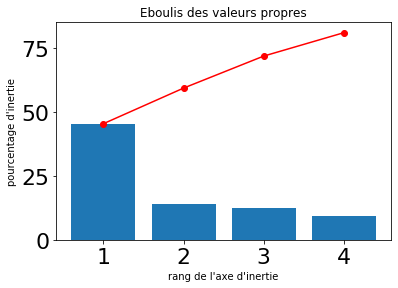

In [244]:
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

### cercle des corrélations 

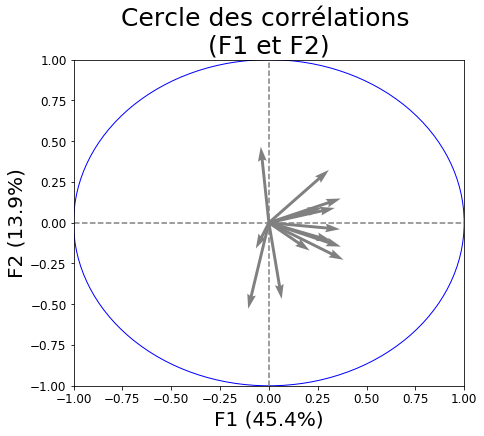

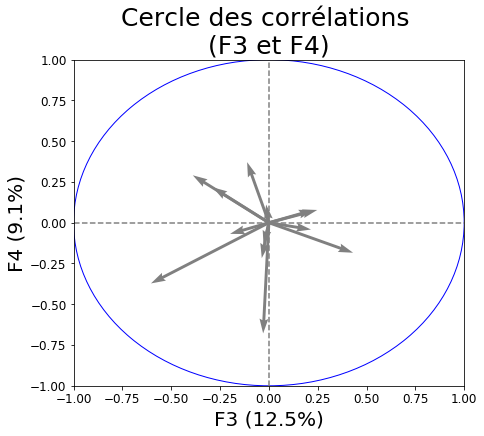

In [245]:
#cercle des corrélations
axis_ranks= [(0,1),(2,3)]
pcs = pca.components_
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
    if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            name_var= False
            if name_var == True:
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, np.array(features)[i], fontsize='14', ha='center', va='center', rotation=0, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)),fontsize= 20)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)),fontsize= 20)

            plt.title("Cercle des corrélations \n(F{} et F{})".format(d1+1, d2+1),size = 25)

In [246]:
#tableau des composantes 
f1 = pca.components_[0].round(2)
f2 = pca.components_[1].round(2)
f3 = pca.components_[2].round(2)
f4 = pca.components_[3].round(2)
ar = np.concatenate(([f1],[f2],[f3],[f4]))
composantes = pd.DataFrame(ar,
                          index = ["F1","F2","F3","F4"],
                          columns = df_type_mean_values.columns)
composantes

,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte
F1,-0.11,0.37,0.37,0.21,0.34,0.07,0.27,-0.07,0.32,0.36,0.31,-0.04,0.38
F2,-0.53,0.15,-0.15,-0.17,0.09,-0.47,0.09,-0.16,-0.11,-0.04,0.32,0.47,-0.23
F3,-0.11,0.22,-0.20,-0.03,0.25,0.43,0.23,-0.60,-0.39,-0.03,-0.29,-0.04,-0.01
F4,0.37,-0.04,-0.07,-0.68,0.08,-0.18,0.08,-0.37,0.29,-0.14,0.22,-0.22,0.11


[Text(0.5, 0, 'Balles portées TL'),
 Text(1.5, 0, 'Balles portées TQ'),
 Text(2.5, 0, 'Balles portées CDD'),
 Text(3.5, 0, 'Jeu au pied'),
 Text(4.5, 0, 'Mètres'),
 Text(5.5, 0, 'Passes après contact'),
 Text(6.5, 0, 'Passes'),
 Text(7.5, 0, 'Plaquages'),
 Text(8.5, 0, 'Rucks'),
 Text(9.5, 0, 'Temps de possession'),
 Text(10.5, 0, 'Nb participants rucks offensifs'),
 Text(11.5, 0, 'Nb participants rucks défensifs'),
 Text(12.5, 0, 'Balles portées')]

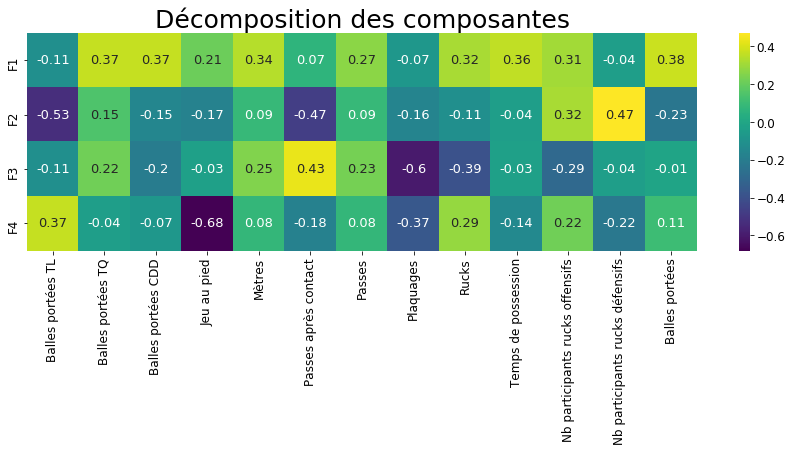

In [247]:
plt.figure(figsize= (15,4))
ax = sns.heatmap(composantes,annot=True,cmap='viridis',annot_kws={"size": 13})
ax.set_title("Décomposition des composantes",fontsize = 25)
ax.set_xticklabels(['Balles portées TL','Balles portées TQ','Balles portées CDD','Jeu au pied',
                    'Mètres','Passes après contact','Passes','Plaquages',"Rucks",'Temps de possession',
                   "Nb participants rucks offensifs",'Nb participants rucks défensifs',"Balles portées"])

###  projection des individus 

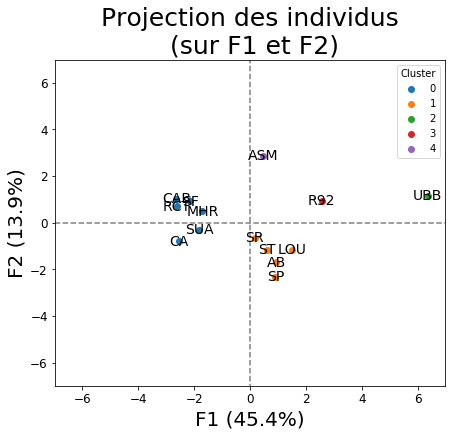

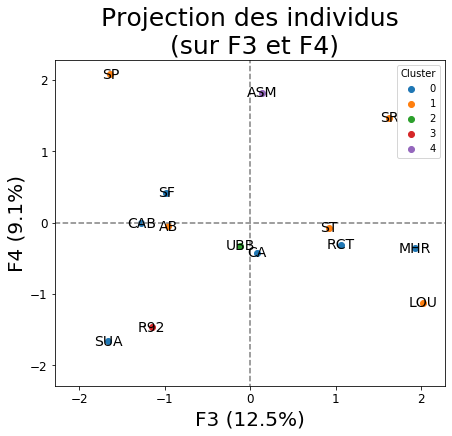

In [248]:
axis_ranks= [(0,1),(2,3)]
X_projected = pca.transform(X_scaled)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            illustrative_var = df_type_mean.cluster
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=1, label=value)
            plt.legend()
            
            # affichage des noms
            aff_nom = True
            if aff_nom== True:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, names[i],
                                fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')
            plt.legend(title='Cluster')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)),fontsize= 20)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)),fontsize= 20)

            plt.title("Projection des individus\n (sur F{} et F{})".format(d1+1, d2+1),size = 25)


### Projection des centroïdes

In [249]:
#pojection des centoïdes clusterCaracMean
caclulMeanX_projected = pd.DataFrame(X_projected)
caclulMeanX_projected["cluster"]= df_type_mean.cluster
caclulMeanX_projected = caclulMeanX_projected.groupby("cluster").agg("mean")
caclulMeanX_projectedValue = caclulMeanX_projected.values
caclulMeanX_projected = caclulMeanX_projected.reset_index()

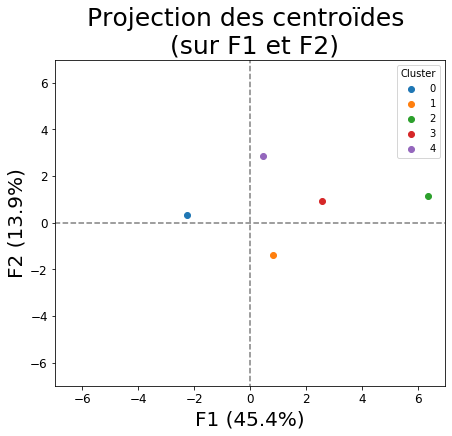

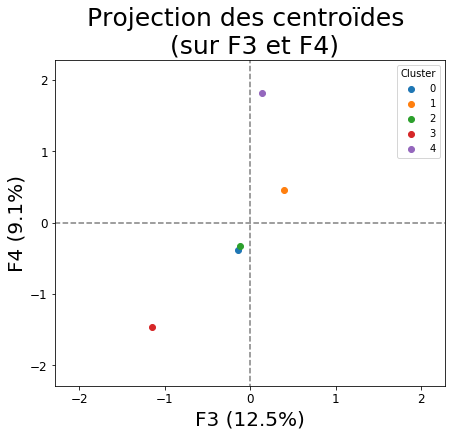

In [250]:
axis_ranks= [(0,1),(2,3)]
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            illustrative_var = caclulMeanX_projected.cluster
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(caclulMeanX_projected.loc[selected, d1], caclulMeanX_projected.loc[selected, d2], alpha=1, label=value)
            plt.legend()

                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
            plt.legend(title='Cluster')
    
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)),fontsize= 20)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)),fontsize= 20)

            plt.title("Projection des centroïdes \n (sur F{} et F{})".format(d1+1, d2+1),size = 25)


### Contributions des individus à l'inertie totale et Qualité de représentation des individus

In [251]:
#calcul contributions
acp_verif = decomposition.PCA(n_components=df_type_mean.drop(["equipe","cluster"], axis = 1).shape[1])
df_type_mean.drop(["equipe","cluster"], axis = 1).shape[1]
dataContrib =df_type_mean.copy()
di = np.sum(X_scaled**2,axis=1)
dataContrib["di"] = di


In [252]:
# calul de la qualité 
acp_verif = decomposition.PCA(n_components=df_type_mean.drop(["equipe","cluster"], axis = 1).shape[1])
coord = acp_verif.fit_transform(X_scaled)
cos2 = coord**2
for j in range(df_type_mean.drop(["equipe","cluster"], axis = 1).shape[1]):
    cos2[:,j] = cos2[:,j]/di
dataContrib["qualite_sur_F1"] = cos2[:,0]
dataContrib["qualite_sur_F2"] = cos2[:,1]
dataContrib["qualite_sur_F3"] = cos2[:,2]
dataContrib["qualite_sur_F4"] = cos2[:,3]
dataContribQuali = dataContrib[["equipe","di","qualite_sur_F1","qualite_sur_F2","qualite_sur_F3","qualite_sur_F4"]]
dataContribQualiCluster = dataContrib[["cluster","di","qualite_sur_F1","qualite_sur_F2","qualite_sur_F3","qualite_sur_F4"]]

In [253]:
#stat descri 
dataContribQualiStat = dataContribQualiCluster.groupby("cluster").agg(["mean","std","var","count"])
dataContribQualiStat

di                            qualite_sur_F1            \
              mean       std        var count           mean       std   
cluster                                                                  
0        10.187030  2.285444   5.223253     6       0.521366  0.190124   
1         9.639791  3.547410  12.584118     5       0.082137  0.063847   
2        44.529663       NaN        NaN     1       0.906540       NaN   
3        14.893752       NaN        NaN     1       0.441900       NaN   
4        13.255450       NaN        NaN     1       0.016721       NaN   

                        qualite_sur_F2                            \
              var count           mean       std       var count   
cluster                                                            
0        0.036147     6       0.058368  0.040159  0.001613     6   
1        0.004076     5       0.230593  0.147810  0.021848     5   
2             NaN     1       0.029869       NaN       NaN     1   
3             NaN     1       0.058634       NaN       NaN     1   
4             NaN     1       0.625899       NaN       NaN     1   

        qualite_sur_F3                           qualite_sur_F4            \
                  mean       std       var count           mean       std   
cluster                                                                     
0             0.168889  0.147299  0.021697     6       0.050976  0.093131   
1             0.222798  0.099365  0.009873     5       0.136176  0.146965   
2             0.000318       NaN       NaN     1       0.002414       NaN   
3             0.089231       NaN       NaN     1       0.144511       NaN   
4             0.001428       NaN       NaN     1       0.249493       NaN   

                         
              var count  
cluster                  
0        0.008673     6  
1        0.021599     5  
2             NaN     1  
3             NaN     1  
4             NaN     1

In [254]:
dataContribQualiCluster

,cluster,di,qualite_sur_F1,qualite_sur_F2,qualite_sur_F3,qualite_sur_F4
0,0,11.476889,0.291129,0.008016,0.240664,0.240257
1,1,8.001903,0.111242,0.360299,0.115243,0.000308
2,2,44.529663,0.906540,0.029869,0.000318,0.002414
3,0,11.421073,0.610642,0.092911,0.141996,0.000008
4,0,7.993357,0.802698,0.077972,0.000754,0.021857
5,4,13.255450,0.016721,0.625899,0.001428,0.249493
6,1,7.936009,0.003180,0.054439,0.333029,0.271887
7,1,12.718216,0.173515,0.108416,0.322006,0.099001
8,0,8.812481,0.329708,0.026449,0.423744,0.014437
9,1,13.969007,0.058896,0.386990,0.191121,0.308852


In [255]:
#vvérifications la théorie -somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [256]:
#qui contribue le plus 
contribPlus = dataContribQuali.nlargest(20,'di')
contribPlus 

,equipe,di,qualite_sur_F1,qualite_sur_F2,qualite_sur_F3,qualite_sur_F4
2,UBB,44.529663,0.906540,0.029869,0.000318,0.002414
10,R92,14.893752,0.441900,0.058634,0.089231,0.144511
9,SP,13.969007,0.058896,0.386990,0.191121,0.308852
12,RCT,13.509437,0.511235,0.036817,0.083986,0.006914
5,ASM,13.255450,0.016721,0.625899,0.001428,0.249493
7,LOU,12.718216,0.173515,0.108416,0.322006,0.099001
0,SUA,11.476889,0.291129,0.008016,0.240664,0.240257
3,CAB,11.421073,0.610642,0.092911,0.141996,0.000008
8,MHR,8.812481,0.329708,0.026449,0.423744,0.014437
1,AB,8.001903,0.111242,0.360299,0.115243,0.000308


## Illustration différence entre cluster

In [257]:
df_cluster = df_type_mean[["equipe","cluster"]]
df_illu = df.merge(df_cluster, on="equipe", how = 'left')

### par moyenne équipe

In [258]:
for i in df_type_mean.columns : 
    dataIllu = df_type_mean.sort_values("cluster").reset_index()
    fig = px.box(dataIllu, x=i, color="cluster")
    name = i+".png"
    fig.update_layout( xaxis_title=i.capitalize())
    fig.update_layout({"paper_bgcolor": "rgba(0, 0, 0, 0)"})
    fig.update_xaxes(title_font ={"size" :20},tickfont ={"size":14})
    fig.show()

In [259]:
for i in df_type_mean.columns : 
    fig = go.Figure()
    fig.update_layout(title= i)
    for j in df_type_mean.cluster.unique():
        fig.add_trace(go.Box(x= df_type_mean[df_type_mean["cluster"]==j][i],
                             boxmean=True,
                            name= str(j)))
    fig.show()

### tous les matchs

In [260]:
df_illu = df_illu[df_type_mean.columns.values]
for i in df_illu.columns : 
    fig = go.Figure()
    fig.update_layout(title= i)
    for j in df_type_mean.cluster.unique():
        fig.add_trace(go.Box(x= df_illu[df_illu["cluster"]==j][i],
                             boxmean=True,
                            name= str(j)))
    fig.show()

# Facteurs de victoire  (factuelle)

In [261]:
def generate_accuracy_and_heatmapr(model,x,y):
#   cm = confusion_matrix(y,model.predict(x))
#   sns.heatmap(cm,annot=True, fmt ="d")
    ac =accuracy_score(y,model.predict(x))
    f_score = f1_score(y, model.predict(x))
    print("Accurarcy is: ",ac)
    print("F1 score is: ",f_score)
    print("\n")
    print (pd.crosstab(pd.Series(model.predict(x),name='Predicted'),
                      pd.Series(y["victoire"],name="Actual")))
    return 1

In [262]:
#création des DF
df_cluster = df_type_mean[["equipe","cluster"]]
df_reg_log = df.merge(df_cluster, on="equipe", how = 'left')
df_reg_log= df_reg_log.drop(["date","match","equipe","domicile"],axis=1)
df_reg_log_type0 = df_reg_log[df_reg_log["cluster"]==0].drop("cluster", axis =1)
df_reg_log_type1 = df_reg_log[df_reg_log["cluster"]==1].drop("cluster", axis =1)
df_reg_log_type2 = df_reg_log[df_reg_log["cluster"]==2].drop("cluster", axis =1)
df_reg_log_type3 = df_reg_log[df_reg_log["cluster"]==3].drop("cluster", axis =1)
df_reg_log_type4 = df_reg_log[df_reg_log["cluster"]==4].drop("cluster", axis =1)
df_reg_log=df_reg_log.copy().drop("cluster", axis =1)

In [263]:
df.victoire.value_counts()

0    125
1    113
Name: victoire, dtype: int64

In [264]:
df_reg_log.shape

(238, 53)

## verif colone catégorie

In [265]:
categorical_feature_columns = list(set(df_reg_log.columns)-set(df_reg_log._get_numeric_data().columns))
categorical_feature_columns

[]

In [266]:
numerical_feature_columns = list(df_reg_log._get_numeric_data().columns)

## corrélation entre variable 

In [267]:
target= "victoire"

In [268]:
correl = False
if correl ==True :
    k= 53
    cols = df_reg_log[numerical_feature_columns].corr().nlargest(k,target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize= (50,25))
    sns.heatmap(cm,annot=True,cmap='viridis')

In [269]:
# Retrait de points et transo très corrélé ainsi que lancé perdu 
#df_reg_log = df_reg_log.drop(["points","transformation","lance_perdu","essais","penalite_transfo"],axis=1)

## premiere modelisation LogisiticRegression

In [270]:
X = df_reg_log.loc[:,df_reg_log.columns != target]
names = X.columns
Y = df_reg_log.loc[:,df_reg_log.columns == target]

In [271]:
X.shape

(238, 52)

In [272]:
Y.shape

(238, 1)

In [273]:
X_premiere_modelisation = preprocessing.scale(X)
X_premiere_modelisation = pd.DataFrame(X_premiere_modelisation, columns = names)

In [274]:
x_train,x_test,y_train,y_test = train_test_split(X_premiere_modelisation,Y,test_size = 0.33, random_state = 8)

In [275]:
x_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [276]:
clf_lr= LogisticRegression()
lr_baseline_model= clf_lr.fit(x_train,y_train.values.ravel())
lr_baseline_model.coef_

array([[ 1.41389794e+00, -9.91057273e-04, -2.64357864e-01,
         1.62347286e-01,  2.43722197e-02,  1.12877861e-01,
         2.39104870e-01, -9.82713119e-02,  1.09605064e-01,
        -1.59910076e-01, -1.18943438e-01, -7.86702237e-01,
        -7.58995599e-02, -1.76470196e-01, -2.69760027e-03,
        -1.71064081e-01,  1.55159195e-01,  1.19522196e+00,
        -1.44976033e-01, -5.56090503e-01,  1.58134052e-01,
         1.03821981e-01,  1.56905968e-01,  4.50906856e-01,
        -7.58092086e-01,  1.91777395e-01,  4.11062308e-01,
        -1.83731483e-02, -3.52559489e-01,  1.35387259e-01,
         2.29084042e-01,  1.18161990e+00,  5.08483085e-01,
         2.48806721e-02, -5.07293677e-02,  4.58691057e-01,
         5.45784751e-01,  8.33876929e-01, -8.64500785e-01,
         1.38810896e+00,  1.46797558e+00, -2.17946565e-01,
        -2.24096535e-01, -4.50062371e-01,  8.83774748e-01,
         8.17728118e-01,  6.74612331e-01,  9.01425897e-02,
         3.83555175e-01, -4.21052113e-02, -2.53247258e-0

In [277]:
generate_accuracy_and_heatmapr(lr_baseline_model,x_test,y_test)

Accurarcy is:  0.7974683544303798
F1 score is:  0.7777777777777778


Actual      0   1
Predicted        
0          35   9
1           7  28


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [278]:
rfecv = RFECV(estimator=clf_lr,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train,y_train.values.ravel())
print ("optimal number of features: ",rfecv.n_features_)
print ("Best features: ", x_train.columns[rfecv.support_])

optimal number of features:  12
Best features:  Index(['points', 'tq_plaquages_manques', 'transformation', 'penalite_transfo',
       'essais', 'turnover_cons', 'turnover_acquis', 'melee', 'rucks',
       'ratio_rucks', 'temps_possession_s', 'temps_jeu_eff_s'],
      dtype='object')


In [279]:
rfecv.grid_scores_

array([0.76028226, 0.74153226, 0.74778226, 0.79153226, 0.75403226,
       0.76068548, 0.79818548, 0.83568548, 0.83608871, 0.83004032,
       0.84879032, 0.85504032, 0.84254032, 0.84899194, 0.84858871,
       0.83608871, 0.84254032, 0.83004032, 0.8296371 , 0.82358871,
       0.82983871, 0.82379032, 0.83004032, 0.83629032, 0.82358871,
       0.83629032, 0.82983871, 0.82358871, 0.82358871, 0.82983871,
       0.8233871 , 0.81068548, 0.81068548, 0.8171371 , 0.81733871,
       0.8108871 , 0.81733871, 0.8233871 , 0.8171371 , 0.8171371 ,
       0.8171371 , 0.8171371 , 0.8171371 , 0.8296371 , 0.8296371 ,
       0.8233871 , 0.8233871 , 0.8233871 , 0.8296371 , 0.8233871 ,
       0.8233871 , 0.8233871 ])

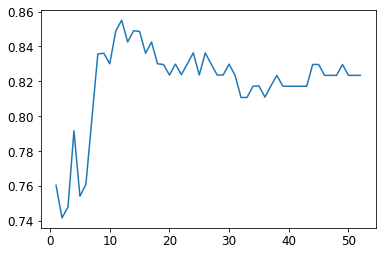

In [280]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [281]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [282]:
lr_rfecv_model=clf_lr.fit(x_train_rfecv,y_train.values.ravel())
coeff = pd.DataFrame(lr_rfecv_model.coef_, columns = x_train.columns[rfecv.support_])
coeff

,points,tq_plaquages_manques,transformation,penalite_transfo,essais,turnover_cons,turnover_acquis,melee,rucks,ratio_rucks,temps_possession_s,temps_jeu_eff_s
0,1.256156,-0.967618,0.631226,1.036027,1.037618,-0.716185,1.001257,1.107302,-0.732802,0.792019,1.058214,0.718052


In [283]:
generate_accuracy_and_heatmapr(lr_rfecv_model,x_test_rfecv,y_test)

Accurarcy is:  0.810126582278481
F1 score is:  0.7945205479452055


Actual      0   1
Predicted        
0          35   8
1           7  29


1

## Deuxième modélisation avec Forest

In [284]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train,y_train.values.ravel())

In [285]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test,y_test)

Accurarcy is:  0.7848101265822784
F1 score is:  0.7301587301587302


Actual      0   1
Predicted        
0          39  14
1           3  23


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [286]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train_rfecv,y_train.values.ravel())

In [287]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test_rfecv,y_test)

Accurarcy is:  0.7848101265822784
F1 score is:  0.7384615384615384


Actual      0   1
Predicted        
0          38  13
1           4  24


1

# Facteurs de victoire sans les points (factuelle)

## premiere modelisation LogisiticRegression

In [288]:
X = df_reg_log.loc[:,df_reg_log.columns != target].drop(["points"], axis = 1)
names = X.columns
Y = df_reg_log.loc[:,df_reg_log.columns == target]

In [289]:
X.shape

(238, 51)

In [290]:
Y.shape

(238, 1)

In [291]:
X_premiere_modelisation = preprocessing.scale(X)
X_premiere_modelisation = pd.DataFrame(X_premiere_modelisation, columns = names)

In [292]:
x_train,x_test,y_train,y_test = train_test_split(X_premiere_modelisation,Y,test_size = 0.33, random_state = 8)

In [293]:
x_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [294]:
clf_lr= LogisticRegression()
lr_baseline_model= clf_lr.fit(x_train,y_train.values.ravel())
lr_baseline_model.coef_

array([[-0.02094375, -0.22351817,  0.16419826, -0.0090765 ,  0.12964383,
         0.26867112, -0.10664798,  0.04461832, -0.15550991, -0.06973448,
        -0.78767242, -0.07327284, -0.17846484,  0.03353194, -0.20357196,
         0.1661509 ,  1.61148809, -0.12250844, -0.53725955,  0.18231846,
         0.12089633,  0.2028359 ,  0.39594018, -0.82554697,  0.15843661,
         0.38770585,  0.02276542, -0.34209984,  0.12999246,  0.26256139,
         1.54469971,  0.44498192,  0.00598672, -0.0506858 ,  0.42153888,
         0.55566404,  1.48247318, -0.86691427,  1.35153139,  1.41991314,
        -0.18689382, -0.19787451, -0.49936212,  0.86091233,  0.80495654,
         0.57123099,  0.1169572 ,  0.37244519, -0.02583394, -0.17438249,
        -0.2536015 ]])

In [295]:
generate_accuracy_and_heatmapr(lr_baseline_model,x_test,y_test)

Accurarcy is:  0.7848101265822784
F1 score is:  0.7605633802816901


Actual      0   1
Predicted        
0          35  10
1           7  27


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [296]:
rfecv = RFECV(estimator=clf_lr,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train,y_train.values.ravel())
print ("optimal number of features: ",rfecv.n_features_)
print ("Best features: ", x_train.columns[rfecv.support_])

optimal number of features:  10
Best features:  Index(['tq_plaquages_manques', 'transformation', 'penalite_transfo', 'essais',
       'turnover_cons', 'turnover_acquis', 'melee', 'rucks', 'ratio_rucks',
       'temps_possession_s'],
      dtype='object')


In [297]:
rfecv.grid_scores_

array([0.72883065, 0.76673387, 0.77298387, 0.74153226, 0.72923387,
       0.77318548, 0.81693548, 0.83568548, 0.8171371 , 0.84254032,
       0.84254032, 0.82358871, 0.84254032, 0.82358871, 0.83629032,
       0.82379032, 0.81108871, 0.81108871, 0.82379032, 0.82358871,
       0.81108871, 0.81733871, 0.83004032, 0.82379032, 0.8171371 ,
       0.81108871, 0.82358871, 0.81108871, 0.82358871, 0.82358871,
       0.82358871, 0.83629032, 0.82358871, 0.83608871, 0.82358871,
       0.8108871 , 0.8108871 , 0.8046371 , 0.8046371 , 0.8046371 ,
       0.8046371 , 0.8108871 , 0.8046371 , 0.8108871 , 0.8108871 ,
       0.8108871 , 0.8108871 , 0.8108871 , 0.8046371 , 0.8108871 ,
       0.8108871 ])

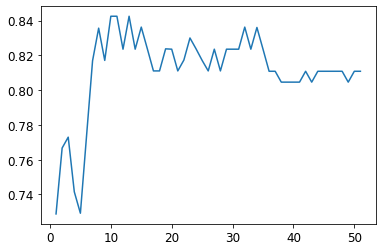

In [298]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [299]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [300]:
lr_rfecv_model=clf_lr.fit(x_train_rfecv,y_train.values.ravel())
coeff = pd.DataFrame(lr_rfecv_model.coef_, columns = x_train.columns[rfecv.support_])
coeff

,tq_plaquages_manques,transformation,penalite_transfo,essais,turnover_cons,turnover_acquis,melee,rucks,ratio_rucks,temps_possession_s
0,-0.768508,0.957613,1.293617,1.669736,-0.638593,0.979691,0.873189,-0.680451,0.769906,1.342278


In [301]:
generate_accuracy_and_heatmapr(lr_rfecv_model,x_test_rfecv,y_test)

Accurarcy is:  0.7848101265822784
F1 score is:  0.7671232876712328


Actual      0   1
Predicted        
0          34   9
1           8  28


1

## Deuxième modélisation avec Forest

In [302]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train,y_train.values.ravel())

In [303]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test,y_test)

Accurarcy is:  0.7341772151898734
F1 score is:  0.6666666666666666


Actual      0   1
Predicted        
0          37  16
1           5  21


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [304]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train_rfecv,y_train.values.ravel())

In [305]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test_rfecv,y_test)

Accurarcy is:  0.759493670886076
F1 score is:  0.6984126984126985


Actual      0   1
Predicted        
0          38  15
1           4  22


1

# Facteurs de victoire sans les facteurs de points  (factuelle)

## premiere modelisation LogisiticRegression

In [306]:
X = df_reg_log.loc[:,df_reg_log.columns != target].drop(["points","essais",'transformation',"penalite_transfo"], axis = 1)
names = X.columns
Y = df_reg_log.loc[:,df_reg_log.columns == target]

In [307]:
X.shape

(238, 48)

In [308]:
Y.shape

(238, 1)

In [309]:
X_premiere_modelisation = preprocessing.scale(X)
X_premiere_modelisation = pd.DataFrame(X_premiere_modelisation, columns = names)

In [310]:
x_train,x_test,y_train,y_test = train_test_split(X_premiere_modelisation,Y,test_size = 0.33, random_state = 8)

In [311]:
x_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [312]:
clf_lr= LogisticRegression()
lr_baseline_model= clf_lr.fit(x_train,y_train.values.ravel())
lr_baseline_model.coef_

array([[-4.22140304e-01, -1.20039331e-01,  2.29484161e-01,
        -2.57151200e-01,  1.25074047e-01,  2.21953371e-01,
        -5.74505613e-02, -7.64753093e-02, -2.36692186e-01,
         2.97220026e-01, -7.06402668e-01, -1.64574446e-01,
        -3.56472185e-01,  1.29668744e-01, -3.06899980e-01,
         4.69282605e-01, -1.09726684e-01, -3.27050867e-01,
         3.19992178e-01,  2.18710910e-01,  3.46276801e-01,
         2.80670016e-01, -9.20136456e-01, -8.68284118e-02,
         4.48935911e-01,  3.36936759e-01, -3.05164051e-01,
        -7.61291069e-03,  3.54645386e-01, -1.02413010e-02,
        -1.26047099e-01,  8.92242776e-02,  2.16300105e-02,
         2.03779754e-01, -1.04595131e+00,  1.04271211e+00,
         8.61333511e-01, -8.04016890e-02,  5.32108199e-02,
        -7.17491924e-01,  7.78911121e-01,  1.08170580e+00,
        -2.24728685e-01,  5.44031907e-02,  5.47311636e-01,
        -3.65671210e-04,  8.52864535e-02,  3.05556938e-01]])

In [313]:
generate_accuracy_and_heatmapr(lr_baseline_model,x_test,y_test)

Accurarcy is:  0.7341772151898734
F1 score is:  0.7200000000000001


Actual      0   1
Predicted        
0          31  10
1          11  27


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [314]:
rfecv = RFECV(estimator=clf_lr,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train,y_train.values.ravel())
print ("optimal number of features: ",rfecv.n_features_)
print ("Best features: ", x_train.columns[rfecv.support_])

optimal number of features:  9
Best features:  Index(['tq_plaquages_manques', 'cdd_pen_cons', 'metres', 'turnover_cons',
       'turnover_acquis', 'melee', 'rucks', 'ratio_rucks',
       'temps_possession_s'],
      dtype='object')


In [315]:
rfecv.grid_scores_

array([0.55423387, 0.61612903, 0.61552419, 0.67258065, 0.66048387,
       0.67318548, 0.71068548, 0.74858871, 0.77399194, 0.76814516,
       0.74879032, 0.7296371 , 0.7171371 , 0.7421371 , 0.7296371 ,
       0.7171371 , 0.7233871 , 0.7296371 , 0.7108871 , 0.7296371 ,
       0.7421371 , 0.7358871 , 0.7358871 , 0.7483871 , 0.7483871 ,
       0.74193548, 0.74193548, 0.74193548, 0.73548387, 0.7546371 ,
       0.74193548, 0.7483871 , 0.7483871 , 0.74193548, 0.74818548,
       0.74193548, 0.74818548, 0.74818548, 0.74193548, 0.74193548,
       0.75443548, 0.74818548, 0.74818548, 0.74818548, 0.74818548,
       0.74818548, 0.74818548, 0.74818548])

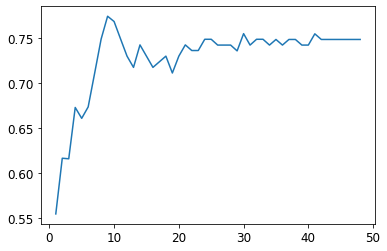

In [316]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [317]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [318]:
lr_rfecv_model=clf_lr.fit(x_train_rfecv,y_train.values.ravel())
coeff = pd.DataFrame(lr_rfecv_model.coef_, columns = x_train.columns[rfecv.support_])
coeff

,tq_plaquages_manques,cdd_pen_cons,metres,turnover_cons,turnover_acquis,melee,rucks,ratio_rucks,temps_possession_s
0,-0.764759,-0.728489,0.909913,-0.997217,0.98876,0.638462,-1.221979,0.792841,1.017557


In [319]:
generate_accuracy_and_heatmapr(lr_rfecv_model,x_test_rfecv,y_test)

Accurarcy is:  0.6962025316455697
F1 score is:  0.6666666666666667


Actual      0   1
Predicted        
0          31  13
1          11  24


1

## Deuxième modélisation avec Forest

In [320]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train,y_train.values.ravel())

In [321]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test,y_test)

Accurarcy is:  0.6962025316455697
F1 score is:  0.6363636363636365


Actual      0   1
Predicted        
0          34  16
1           8  21


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [322]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train_rfecv,y_train.values.ravel())

In [323]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test_rfecv,y_test)

Accurarcy is:  0.6455696202531646
F1 score is:  0.588235294117647


Actual      0   1
Predicted        
0          31  17
1          11  20


1

# Type d'équipe (relatif)

In [324]:
df_type = dfrela[["equipe","tl_porte",'tq_porte','cdd_porte','jeu_au_pied','metres','passes_apres_contact','passes','plaquages','rucks','temps_possession_s','nb_paricipant_ruck_off',"nb_participant_ruck_def","balles_porte"]]

In [325]:
df_type.head()

,equipe,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte
0,SUA,4.0,-8.0,-16.0,-8.0,-100.0,-2.0,-34.0,35.0,-20.0,-372.0,-59.0,17.0,-20.0
1,RCT,-4.0,8.0,16.0,8.0,100.0,2.0,34.0,-35.0,20.0,372.0,59.0,-17.0,20.0
2,UBB,-17.0,9.0,3.0,1.0,-7.0,-4.0,-12.0,5.0,4.0,-97.0,34.0,19.0,-5.0
3,ST,17.0,-9.0,-3.0,-1.0,7.0,4.0,12.0,-5.0,-4.0,97.0,-34.0,-19.0,5.0
4,CA,-6.0,-13.0,-6.0,6.0,-175.0,-6.0,-36.0,12.0,3.0,25.0,29.0,-5.0,-25.0


## groupby Equipe mean

In [326]:
df_type_mean = df_type.groupby("equipe").mean()

## Centrage et réduction

In [327]:
#préparation données ACP

X = df_type_mean.values
names = df_type_mean.index
features = df_type_mean.columns

#centrage et réduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [328]:
df_type_mean_red = pd.DataFrame(X_scaled, columns = features, index = names )
df_type_mean_red

,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte
equipe,,,,,,,,,,,,,
AB,0.614045,-0.224494,0.550899,0.182035,-0.217889,0.935351,-1.075893,-0.458525,0.378916,-0.122548,0.449842,1.045296,0.290536
ASM,0.969545,0.771087,0.688624,-0.156030,0.561038,-0.870094,1.089469,-1.602567,1.870895,1.524065,2.157891,-0.143472,0.993106
CA,-0.581727,-0.819890,-1.528746,0.494096,-1.225231,-0.500304,-1.058923,1.134963,-1.089382,-0.504780,-0.963948,1.168272,-1.220252
CAB,-0.904909,-1.395765,-1.280841,-0.234046,-0.695771,-0.522056,-1.696992,1.266618,-1.499874,-1.150587,-0.747483,1.680672,-1.542483
LOU,1.308886,0.517312,0.964074,1.196233,1.091551,2.001216,0.828132,-0.608340,0.094729,0.931752,-0.135291,1.055544,1.077625
MHR,-0.500932,0.273297,-0.082635,-0.780152,0.493671,1.174627,0.095032,0.022699,-0.647314,-0.412383,-0.886156,0.614880,-0.047542
R92,-0.759477,-0.204972,0.316767,1.898369,0.363148,-1.892455,0.363156,0.517543,-0.315763,0.725560,-0.236759,-0.256200,-0.237711
RCT,-1.341204,-0.429466,-0.468264,-0.026005,-0.346307,-0.565561,-0.553219,0.245152,-0.584161,-0.136164,-0.659543,-0.594384,-0.850479
SF,0.161591,-0.985820,-0.688624,-0.416081,-1.043131,-0.957103,-0.424248,0.549322,-0.118411,-0.966765,-0.037205,0.748104,-0.744829


## Clustering 

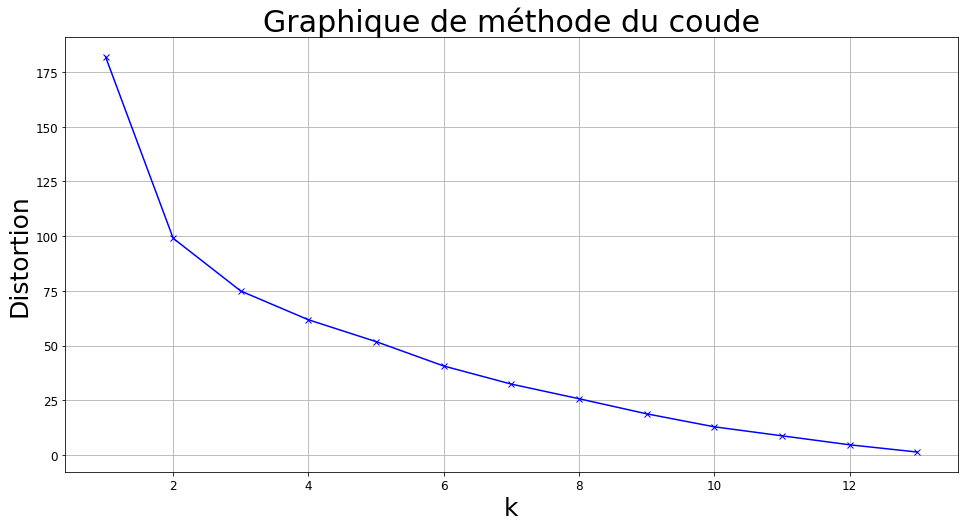

In [329]:
#détermination du  nombre de cluster (méthode du coude)
# détermination 
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)
    
# graphique de distortion
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k',fontsize = 25)
plt.ylabel('Distortion',fontsize = 25)
plt.title('Graphique de méthode du coude', fontsize = 30)
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)

plt.grid()

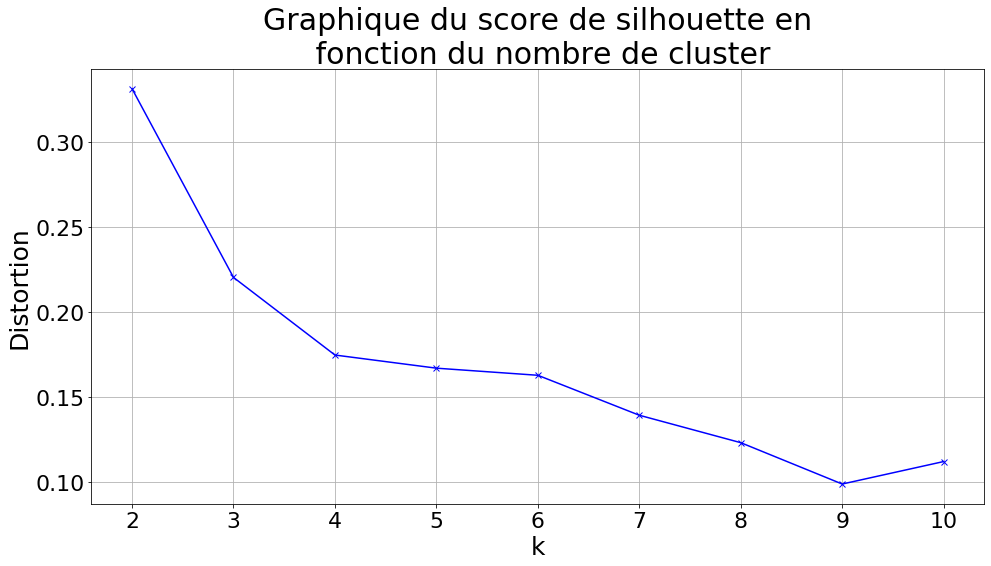

In [330]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))

# graphique de distortion
plt.figure(figsize=(16,8))
plt.plot(range(2, kmax+1), sil, 'bx-')
plt.xlabel('k',fontsize = 25)
plt.ylabel('Distortion',fontsize = 25)
plt.title('Graphique du score de silhouette en\n fonction du nombre de cluster', fontsize = 30)
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)


plt.grid()

In [331]:
#Clustering : plus de 3 ne sert pas à grand chose 
# K-means 
n_clust = 4
km = KMeans (n_clusters = n_clust)
km.fit(X_scaled)
clustersKm = km.labels_
Counter(clustersKm)
pd.DataFrame.from_dict(Counter(clustersKm), orient='index').reset_index().sort_values(0)

,index,0
0,2,3
2,0,3
1,1,4
3,3,4


In [332]:
affiliationCluster = False
if affiliationCluster== True :
    df_type_mean["cluster"]= clustersKm
    df_type_mean.to_csv("df_type_mean_rela.csv")

In [333]:
df_type_mean = pd.read_csv("df_type_mean_rela.csv",index_col = 0)
df_type_mean.reset_index(inplace = True)
df_type_mean.replace({"Agen":"SUA","Toulon":"RCT","Bordeaux Begles":"UBB", 'Toulouse':"ST", 'Castres':"CA",
       'Montpellier':"MHR", 'Clermont Auvergne':"ASM", 'La Rochelle':"SR", 'Lyon':"LOU",
       'Stade Francais':"SF", 'Pau':"SP", 'Brive':"CAB", 'Racing 92':"R92", 'Bayonne':"AB"},inplace =True)

In [334]:
df_type_mean.loc[0,"cluster"]= 0
df_type_mean.loc[1,"cluster"]= 1
df_type_mean.loc[2,"cluster"]= 2
df_type_mean.loc[3,"cluster"]= 0
df_type_mean.loc[4,"cluster"]= 0
df_type_mean.loc[5,"cluster"]= 2
df_type_mean.loc[6,"cluster"]= 2
df_type_mean.loc[7,"cluster"]= 1
df_type_mean.loc[8,"cluster"]= 3
df_type_mean.loc[9,"cluster"]= 3
df_type_mean.loc[10,"cluster"]= 3
df_type_mean.loc[11,"cluster"]= 3
df_type_mean.loc[12,"cluster"]= 3
df_type_mean.loc[13,"cluster"]= 1

df_type_mean[["equipe",'cluster']].sort_values("cluster")

,equipe,cluster
0,SUA,0
3,CAB,0
4,CA,0
1,AB,1
7,LOU,1
13,ST,1
2,UBB,2
5,ASM,2
6,SR,2
8,MHR,3


In [335]:
df_type_mean.drop("index",axis=1,inplace =True)
df_type_mean.groupby("cluster").agg("mean")

,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte
cluster,,,,,,,,,,,,,
0,-2.019608,-7.470588,-6.235294,0.960784,-75.960784,-1.333333,-21.196078,18.960784,-10.392157,-64.705882,-19.392157,4.117647,-15.705882
1,3.980392,0.627451,4.156863,0.803922,28.784314,3.470588,1.000000,-9.705882,2.843137,20.352941,4.098039,0.980392,8.764706
2,0.000000,8.941176,4.215686,-0.549020,61.274510,0.078431,23.549020,-15.490196,10.549020,79.392157,26.411765,-4.725490,13.137255
3,-1.176471,-1.258824,-1.282353,-0.729412,-8.458824,-1.329412,-2.011765,3.741176,-1.800000,-21.023529,-6.670588,-0.223529,-3.717647


In [440]:
df_type_mean

,equipe,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte,cluster
0,SUA,-0.647059,-9.058824,-6.705882,2.294118,-120.529412,-1.235294,-15.823529,25.764706,-11.882353,-94.000000,-28.411765,-4.000000,-16.352941,0
1,AB,2.235294,-1.352941,2.352941,0.411765,-12.176471,2.529412,-18.647059,-5.941176,2.823529,-7.411765,7.823529,6.000000,3.235294,1
2,UBB,-7.000000,12.235294,6.058824,1.176471,78.176471,0.705882,14.470588,-12.470588,8.294118,121.705882,30.764706,-7.117647,11.294118,2
3,CAB,-3.294118,-8.411765,-5.470588,-0.529412,-38.882353,-1.411765,-29.411765,16.411765,-11.176471,-69.588235,-13.000000,9.647059,-17.176471,0
4,CA,-2.117647,-4.941176,-6.529412,1.117647,-68.470588,-1.352941,-18.352941,14.705882,-8.117647,-30.529412,-16.764706,6.705882,-13.588235,0
5,ASM,3.529412,4.647059,2.941176,-0.352941,31.352941,-2.352941,18.882353,-20.764706,13.941176,92.176471,37.529412,-0.823529,11.058824,2
6,SR,3.470588,9.941176,3.647059,-2.470588,74.294118,1.882353,37.294118,-13.235294,9.411765,24.294118,10.941176,-6.235294,17.058824,2
7,LOU,4.764706,3.117647,4.117647,2.705882,61.000000,5.411765,14.352941,-7.882353,0.705882,56.352941,-2.352941,6.058824,12.000000,1
8,MHR,-1.823529,1.647059,-0.352941,-1.764706,27.588235,3.176471,1.647059,0.294118,-4.823529,-24.941176,-15.411765,3.529412,-0.529412,3
9,SP,3.000000,1.823529,-2.470588,-5.176471,-12.529412,-0.588235,-1.058824,1.411765,3.411765,-57.352941,-1.705882,-4.058824,2.352941,3


## ACP

In [336]:
df_type_mean_values = df_type_mean[["tl_porte",'tq_porte',
                                    'cdd_porte','jeu_au_pied','metres',
                                    'passes_apres_contact','passes',
                                    'plaquages','rucks','temps_possession_s',
                                    'nb_paricipant_ruck_off',"nb_participant_ruck_def",
                                    "balles_porte"]]
# nombres de composantes 
n_comp = 4

#préparation données ACP
X = df_type_mean_values.values
names = df_type_mean.equipe
features = df_type_mean_values.columns

#centrage et réduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Eboulis des valeurs propre

Text(0.5, 1.0, 'Eboulis des valeurs propres')

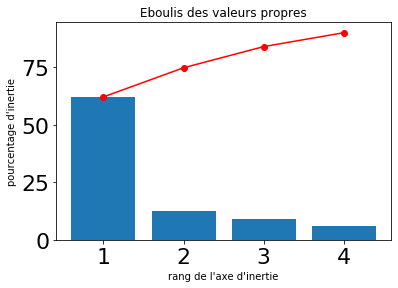

In [337]:
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

### cercle des corrélations 

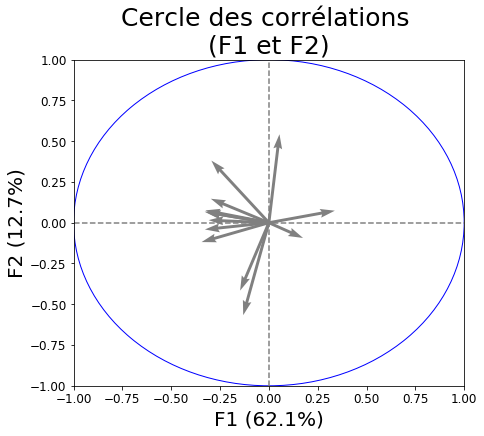

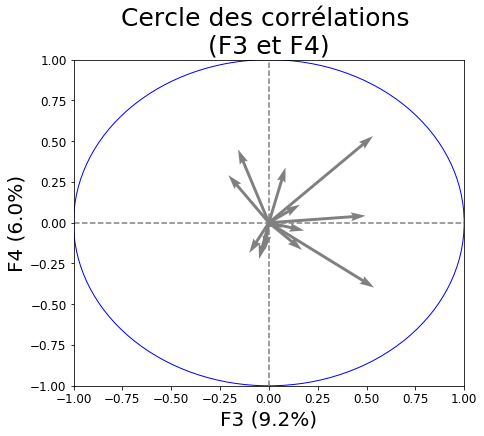

In [338]:
#cercle des corrélations
axis_ranks= [(0,1),(2,3)]
pcs = pca.components_
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
    if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            name_var= False
            if name_var == True:
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, np.array(features)[i], fontsize='14', ha='center', va='center', rotation=0, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)),fontsize= 20)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)),fontsize= 20)

            plt.title("Cercle des corrélations \n(F{} et F{})".format(d1+1, d2+1),size = 25)

In [339]:
#tableau des composantes 
f1 = pca.components_[0].round(2)
f2 = pca.components_[1].round(2)
f3 = pca.components_[2].round(2)
f4 = pca.components_[3].round(2)
ar = np.concatenate(([f1],[f2],[f3],[f4]))
composantes = pd.DataFrame(ar,
                          index = ["F1","F2","f3","f4"],
                          columns = df_type_mean_values.columns)
composantes

,tl_porte,tq_porte,cdd_porte,jeu_au_pied,metres,passes_apres_contact,passes,plaquages,rucks,temps_possession_s,nb_paricipant_ruck_off,nb_participant_ruck_def,balles_porte
F1,-0.13,-0.32,-0.33,0.05,-0.32,-0.15,-0.31,0.34,-0.33,-0.29,-0.30,0.17,-0.34
F2,-0.57,0.08,0.07,0.54,0.06,-0.42,0.02,0.07,-0.04,0.38,0.15,-0.09,-0.12
f3,0.08,-0.05,0.18,0.50,0.17,0.54,-0.10,-0.02,-0.21,0.16,-0.16,0.53,0.07
f4,0.34,-0.22,-0.05,0.04,-0.17,-0.40,-0.19,-0.17,0.29,0.11,0.45,0.53,-0.03


[Text(0.5, 0, 'Balles portées TL'),
 Text(1.5, 0, 'Balles portées TQ'),
 Text(2.5, 0, 'Balles portées CDD'),
 Text(3.5, 0, 'Jeu au pied'),
 Text(4.5, 0, 'Mètres'),
 Text(5.5, 0, 'Passes après contact'),
 Text(6.5, 0, 'Passes'),
 Text(7.5, 0, 'Plaquages'),
 Text(8.5, 0, 'Rucks'),
 Text(9.5, 0, 'Temps de possession'),
 Text(10.5, 0, 'Nb participants rucks offensifs'),
 Text(11.5, 0, 'Nb participants rucks défensifs'),
 Text(12.5, 0, 'Balles portées')]

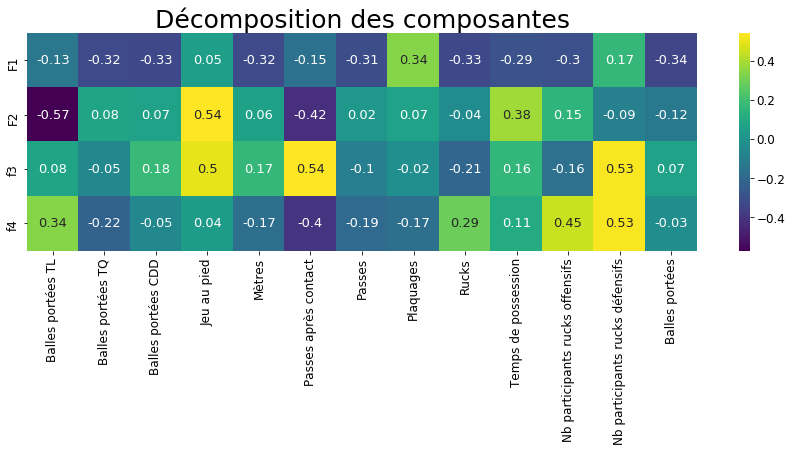

In [340]:
plt.figure(figsize= (15,4))
ax = sns.heatmap(composantes,annot=True,cmap='viridis',annot_kws={"size": 13})
ax.set_title("Décomposition des composantes",fontsize = 25)
ax.set_xticklabels(['Balles portées TL','Balles portées TQ','Balles portées CDD','Jeu au pied',
                    'Mètres','Passes après contact','Passes','Plaquages',"Rucks",'Temps de possession',
                   "Nb participants rucks offensifs",'Nb participants rucks défensifs',"Balles portées"])

###  projection des individus 

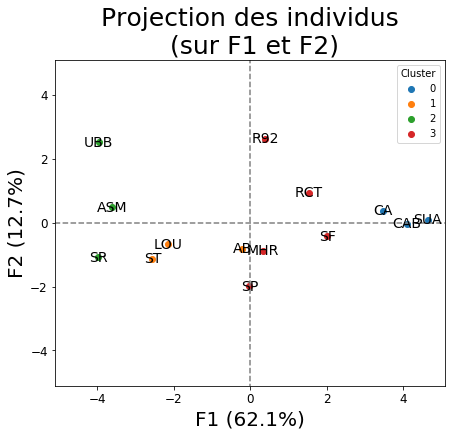

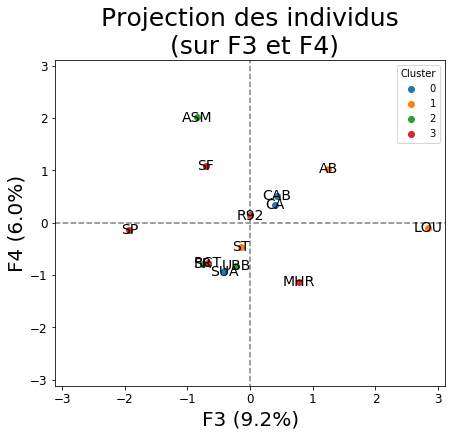

In [341]:
axis_ranks= [(0,1),(2,3)]
X_projected = pca.transform(X_scaled)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            illustrative_var = df_type_mean.cluster
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=1, label=value)
            plt.legend()
            
            # affichage des noms
            aff_nom = True
            if aff_nom== True:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, names[i],
                                fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')
            plt.legend(title='Cluster')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)),fontsize= 20)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)),fontsize= 20)

            plt.title("Projection des individus\n (sur F{} et F{})".format(d1+1, d2+1),size = 25)


### Projection des centroïdes

In [342]:
#pojection des centoïdes clusterCaracMean
caclulMeanX_projected = pd.DataFrame(X_projected)
caclulMeanX_projected["cluster"]= df_type_mean.cluster
caclulMeanX_projected = caclulMeanX_projected.groupby("cluster").agg("mean")
caclulMeanX_projectedValue = caclulMeanX_projected.values
caclulMeanX_projected = caclulMeanX_projected.reset_index()

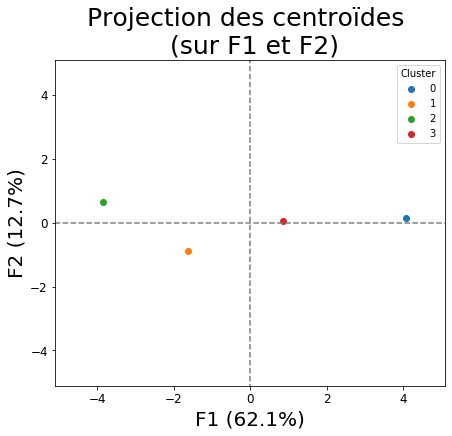

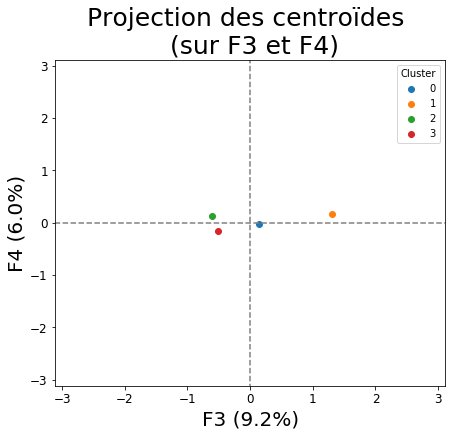

In [343]:
axis_ranks= [(0,1),(2,3)]
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            illustrative_var = caclulMeanX_projected.cluster
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(caclulMeanX_projected.loc[selected, d1], caclulMeanX_projected.loc[selected, d2], alpha=1, label=value)
            plt.legend()

                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')
            plt.legend(title='Cluster')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)),fontsize= 20)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)),fontsize= 20)

            plt.title("Projection des centroïdes \n (sur F{} et F{})".format(d1+1, d2+1),size = 25)


### Contributions des individus à l'inertie totale et Qualité de représentation des individus

In [344]:
#calcul contributions
acp_verif = decomposition.PCA(n_components=df_type_mean.drop(["equipe","cluster"], axis = 1).shape[1])
df_type_mean.drop(["equipe","cluster"], axis = 1).shape[1]
dataContrib =df_type_mean.copy()
di = np.sum(X_scaled**2,axis=1)
dataContrib["di"] = di


In [345]:
# calul de la qualité 
acp_verif = decomposition.PCA(n_components=df_type_mean.drop(["equipe","cluster"], axis = 1).shape[1])
coord = acp_verif.fit_transform(X_scaled)
cos2 = coord**2
for j in range(df_type_mean.drop(["equipe","cluster"], axis = 1).shape[1]):
    cos2[:,j] = cos2[:,j]/di
dataContrib["qualite_sur_F1"] = cos2[:,0]
dataContrib["qualite_sur_F2"] = cos2[:,1]
dataContrib["qualite_sur_F3"] = cos2[:,2]
dataContrib["qualite_sur_F4"] = cos2[:,3]
dataContribQuali = dataContrib[["equipe","di","qualite_sur_F1","qualite_sur_F2","qualite_sur_F3","qualite_sur_F4"]]
dataContribQualiCluster = dataContrib[["cluster","di","qualite_sur_F1","qualite_sur_F2","qualite_sur_F3","qualite_sur_F4"]]

In [346]:
#stat descri 
dataContribQualiStat = dataContribQualiCluster.groupby("cluster").agg(["mean","std","var","count"])
dataContribQualiStat

di                            qualite_sur_F1            \
              mean       std        var count           mean       std   
cluster                                                                  
0        19.239500  6.364607  40.508227     3       0.884653  0.043071   
1         9.759980  4.695417  22.046943     3       0.314848  0.295354   
2        20.745877  3.477858  12.095499     3       0.724344  0.095627   
3         6.552786  2.094324   4.386195     5       0.236006  0.310686   

                        qualite_sur_F2                            \
              var count           mean       std       var count   
cluster                                                            
0        0.001855     3       0.003736  0.006181  0.000038     3   
1        0.087234     3       0.097484  0.057230  0.003275     3   
2        0.009144     3       0.110303  0.129316  0.016723     3   
3        0.096526     5       0.325803  0.289163  0.083615     5   

        qualite_sur_F3                           qualite_sur_F4            \
                  mean       std       var count           mean       std   
cluster                                                                     
0             0.009537  0.002835  0.000008     3       0.018877  0.013015   
1             0.308041  0.291818  0.085158     3       0.083320  0.127373   
2             0.023704  0.019509  0.000381     3       0.093727  0.110508   
3             0.154477  0.176767  0.031247     5       0.122940  0.126897   

                         
              var count  
cluster                  
0        0.000169     3  
1        0.016224     3  
2        0.012212     3  
3        0.016103     5

In [347]:
dataContribQualiCluster

,cluster,di,qualite_sur_F1,qualite_sur_F2,qualite_sur_F3,qualite_sur_F4
0,0,25.701888,0.840217,0.000298,6.716844e-03,0.033586
1,1,4.592232,0.009483,0.143549,3.391897e-01,0.230006
2,2,24.734425,0.635764,0.256986,1.925907e-03,0.027680
3,0,19.039211,0.887529,0.000039,9.506934e-03,0.014191
4,0,12.977402,0.926214,0.010871,1.238738e-02,0.008854
5,2,18.346493,0.711541,0.012760,3.958375e-02,0.221303
6,2,19.156713,0.825728,0.061163,2.960157e-02,0.032197
7,1,13.764323,0.336006,0.033417,5.830356e-01,0.000682
8,3,4.328780,0.025058,0.183050,1.412504e-01,0.297454
9,3,8.118638,0.000045,0.490160,4.573375e-01,0.002362


In [348]:
#vvérifications la théorie -somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [349]:
#qui contribue le plus 
contribPlus = dataContribQuali.nlargest(20,'di')
contribPlus 

,equipe,di,qualite_sur_F1,qualite_sur_F2,qualite_sur_F3,qualite_sur_F4
0,SUA,25.701888,0.840217,0.000298,6.716844e-03,0.033586
2,UBB,24.734425,0.635764,0.256986,1.925907e-03,0.027680
6,SR,19.156713,0.825728,0.061163,2.960157e-02,0.032197
3,CAB,19.039211,0.887529,0.000039,9.506934e-03,0.014191
5,ASM,18.346493,0.711541,0.012760,3.958375e-02,0.221303
7,LOU,13.764323,0.336006,0.033417,5.830356e-01,0.000682
4,CA,12.977402,0.926214,0.010871,1.238738e-02,0.008854
13,ST,10.923384,0.599054,0.115485,1.898916e-03,0.019271
10,R92,9.240305,0.016239,0.747232,2.141673e-07,0.002219
9,SP,8.118638,0.000045,0.490160,4.573375e-01,0.002362


## Illustration différence entre cluster

In [350]:
df_cluster = df_type_mean[["equipe","cluster"]]
df_illu = dfrela.merge(df_cluster, on="equipe", how = 'left')


### Moyenne d'équipe

In [351]:
dataIllu = df_type_mean.sort_values("cluster").reset_index()
for i in df_type_mean.columns : 
    fig = px.box(dataIllu, x=i, color="cluster")
    name = i+".png"
    fig.update_layout( xaxis_title=i.capitalize())
    fig.update_layout({"paper_bgcolor": "rgba(0, 0, 0, 0)"})
    fig.update_xaxes(title_font ={"size" :20},tickfont ={"size":14})
    fig.show()

In [352]:
for i in df_type_mean.columns : 
    fig = go.Figure()
    fig.update_layout(title= i)
    for j in sorted(df_type_mean.cluster.unique()):
        fig.add_trace(go.Box(x= dataIllu[dataIllu["cluster"]==j][i],
                             boxmean=True,
                            name= str(j)))
    fig.show()

### tous les matchs 

In [353]:
df_illu = df_illu[df_type_mean.columns.values]
for i in df_illu.columns : 
    fig = go.Figure()
    fig.update_layout(title= i)
    for j in sorted(df_type_mean.cluster.unique()):
        fig.add_trace(go.Box(x= df_illu[df_illu["cluster"]==j][i],
                             boxmean=True,
                            name= str(j)))
    fig.show()

# Facteurs de victoire  (relatif)

In [354]:
def generate_accuracy_and_heatmapr(model,x,y):
#   cm = confusion_matrix(y,model.predict(x))
#   sns.heatmap(cm,annot=True, fmt ="d")
    ac =accuracy_score(y,model.predict(x))
    f_score = f1_score(y, model.predict(x))
    print("Accurarcy is: ",ac)
    print("F1 score is: ",f_score)
    print("\n")
    print (pd.crosstab(pd.Series(model.predict(x),name='Predicted'),
                      pd.Series(y["victoire"],name="Actual")))
    return 1

In [355]:
#création des DF
df_cluster = df_type_mean[["equipe","cluster"]]
df_reg_log = dfrela.merge(df_cluster, on="equipe", how = 'left')
df_reg_log= df_reg_log.drop(["date","match","equipe","domicile"],axis=1)
df_reg_log_type0 = df_reg_log[df_reg_log["cluster"]==0].drop("cluster", axis =1)
df_reg_log_type1 = df_reg_log[df_reg_log["cluster"]==1].drop("cluster", axis =1)
df_reg_log_type2 = df_reg_log[df_reg_log["cluster"]==2].drop("cluster", axis =1)
df_reg_log_type3 = df_reg_log[df_reg_log["cluster"]==3].drop("cluster", axis =1)
df_reg_log=df_reg_log.copy().drop("cluster", axis =1)

In [356]:
df.victoire.value_counts()

0    125
1    113
Name: victoire, dtype: int64

In [357]:
df_reg_log.shape

(238, 53)

## verif colone catégorie

In [358]:
categorical_feature_columns = list(set(df_reg_log.columns)-set(df_reg_log._get_numeric_data().columns))
categorical_feature_columns

[]

In [359]:
numerical_feature_columns = list(df_reg_log._get_numeric_data().columns)

## corrélation entre variable 

In [360]:
target= "victoire"

In [361]:
correl = False
if correl ==True :
    k= 53
    cols = df_reg_log[numerical_feature_columns].corr().nlargest(k,target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize= (50,25))
    sns.heatmap(cm,annot=True,cmap='viridis')

In [362]:
# Retrait de points et transo très corrélé ainsi que lancé perdu 
#df_reg_log = df_reg_log.drop(["points","transformation","lance_perdu","essais","penalite_transfo"],axis=1)

## premiere modelisation LogisiticRegression

In [363]:
X = df_reg_log.loc[:,df_reg_log.columns != target]
names = X.columns
Y = df_reg_log.loc[:,df_reg_log.columns == target]

In [364]:
X.shape

(238, 52)

In [365]:
Y.shape

(238, 1)

In [366]:
X_premiere_modelisation = preprocessing.scale(X)
X_premiere_modelisation = pd.DataFrame(X_premiere_modelisation, columns = names)

In [367]:
x_train,x_test,y_train,y_test = train_test_split(X_premiere_modelisation,Y,test_size = 0.33, random_state = 8)

In [368]:
x_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [369]:
clf_lr= LogisticRegression()
lr_baseline_model= clf_lr.fit(x_train,y_train.values.ravel())
lr_baseline_model.coef_

array([[ 1.63097096, -0.03010548, -0.3104106 ,  0.04103331, -0.12515737,
        -0.08604572,  0.21122711,  0.07866711,  0.51378748,  0.30073275,
         0.21422973, -0.08274616, -0.09362877, -0.31529444,  0.22844538,
         0.21185057,  0.42123319,  1.36258335,  0.07037215, -0.08078324,
        -0.1054788 , -0.0389126 ,  0.02158406,  0.18205783, -0.73978905,
         0.20007772,  0.71090769,  0.15564673, -0.07037215, -0.02647831,
         0.32770265,  0.99600304, -0.23030748, -0.37565968,  0.25034799,
         0.04795536,  0.19241561,  1.16161072, -0.95249432,  0.54050987,
         0.7534967 ,  0.07475028, -0.0578635 ,  0.03440225,  0.79699109,
         0.33276194,  0.        , -0.08258157,  0.38647456, -0.19689053,
         0.20269572,  0.77632169]])

In [370]:
generate_accuracy_and_heatmapr(lr_baseline_model,x_test,y_test)

Accurarcy is:  0.9113924050632911
F1 score is:  0.9041095890410958


Actual      0   1
Predicted        
0          39   4
1           3  33


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [371]:
rfecv = RFECV(estimator=clf_lr,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train,y_train.values.ravel())
print ("optimal number of features: ",rfecv.n_features_)
print ("Best features: ", x_train.columns[rfecv.support_])

optimal number of features:  1
Best features:  Index(['points'], dtype='object')


In [372]:
rfecv.grid_scores_

array([0.98104839, 0.96854839, 0.9625    , 0.96854839, 0.94334677,
       0.94354839, 0.93064516, 0.92439516, 0.93709677, 0.93084677,
       0.94354839, 0.94979839, 0.94979839, 0.94979839, 0.94354839,
       0.95      , 0.94375   , 0.92479839, 0.92479839, 0.92479839,
       0.91854839, 0.91854839, 0.91854839, 0.91229839, 0.91229839,
       0.91854839, 0.92479839, 0.91854839, 0.93104839, 0.92479839,
       0.92479839, 0.92479839, 0.92479839, 0.92479839, 0.92479839,
       0.92479839, 0.92479839, 0.92479839, 0.92479839, 0.91854839,
       0.91854839, 0.92479839, 0.92479839, 0.92479839, 0.92479839,
       0.92479839, 0.92479839, 0.92479839, 0.92479839, 0.92479839,
       0.92479839, 0.92479839])

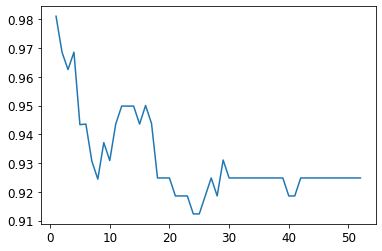

In [373]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [374]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [375]:
lr_rfecv_model=clf_lr.fit(x_train_rfecv,y_train.values.ravel())
coeff = pd.DataFrame(lr_rfecv_model.coef_, columns = x_train.columns[rfecv.support_])
coeff

,points
0,4.513534


In [376]:
generate_accuracy_and_heatmapr(lr_rfecv_model,x_test_rfecv,y_test)

Accurarcy is:  0.9493670886075949
F1 score is:  0.9428571428571428


Actual      0   1
Predicted        
0          42   4
1           0  33


1

## Deuxième modélisation avec Forest

In [377]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train,y_train.values.ravel())

In [378]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test,y_test)

Accurarcy is:  1.0
F1 score is:  1.0


Actual      0   1
Predicted        
0          42   0
1           0  37


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [379]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train_rfecv,y_train.values.ravel())

In [380]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test_rfecv,y_test)

Accurarcy is:  1.0
F1 score is:  1.0


Actual      0   1
Predicted        
0          42   0
1           0  37


1

# Facteurs de victoire sans les points (Relatif)

## premiere modelisation LogisiticRegression

In [381]:
X = df_reg_log.loc[:,df_reg_log.columns != target].drop(["points"], axis = 1)
names = X.columns
Y = df_reg_log.loc[:,df_reg_log.columns == target]

In [382]:
X.shape

(238, 51)

In [383]:
Y.shape

(238, 1)

In [384]:
X_premiere_modelisation = preprocessing.scale(X)
X_premiere_modelisation = pd.DataFrame(X_premiere_modelisation, columns = names)

In [385]:
x_train,x_test,y_train,y_test = train_test_split(X_premiere_modelisation,Y,test_size = 0.33, random_state = 8)

In [386]:
x_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [387]:
clf_lr= LogisticRegression()
lr_baseline_model= clf_lr.fit(x_train,y_train.values.ravel())
lr_baseline_model.coef_

array([[-0.07823173, -0.32449599,  0.06229739, -0.12968856, -0.0476072 ,
         0.25588971,  0.02271049,  0.51225811,  0.29823294,  0.23015707,
        -0.11259878, -0.10870325, -0.33718111,  0.26371523,  0.20161474,
         0.5145244 ,  1.71781297,  0.07272766, -0.06622387, -0.08078698,
        -0.00277388,  0.05391321,  0.1809078 , -0.85464663,  0.23621014,
         0.76044591,  0.18231955, -0.07272766, -0.02374514,  0.40440633,
         1.24305776, -0.25802795, -0.38969038,  0.28728825,  0.02163053,
         0.22616974,  1.6269441 , -1.03376613,  0.54367875,  0.81330472,
         0.10152868, -0.0174595 ,  0.01196373,  0.86478218,  0.34592518,
         0.        , -0.14497032,  0.42733716, -0.18870924,  0.26204044,
         0.7306674 ]])

In [388]:
generate_accuracy_and_heatmapr(lr_baseline_model,x_test,y_test)

Accurarcy is:  0.8860759493670886
F1 score is:  0.8767123287671232


Actual      0   1
Predicted        
0          38   5
1           4  32


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [389]:
rfecv = RFECV(estimator=clf_lr,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train,y_train.values.ravel())
print ("optimal number of features: ",rfecv.n_features_)
print ("Best features: ", x_train.columns[rfecv.support_])

optimal number of features:  3
Best features:  Index(['transformation', 'penalite_transfo', 'essais'], dtype='object')


In [390]:
rfecv.grid_scores_

array([0.79858871, 0.95604839, 0.96229839, 0.93084677, 0.91189516,
       0.91814516, 0.91814516, 0.91834677, 0.93104839, 0.92479839,
       0.92479839, 0.91229839, 0.91854839, 0.91229839, 0.93125   ,
       0.93125   , 0.925     , 0.93125   , 0.925     , 0.91229839,
       0.90604839, 0.88729839, 0.89979839, 0.90604839, 0.89979839,
       0.91229839, 0.89979839, 0.90604839, 0.91229839, 0.91854839,
       0.91229839, 0.91229839, 0.91229839, 0.90604839, 0.90604839,
       0.89979839, 0.90604839, 0.90604839, 0.90604839, 0.89979839,
       0.89979839, 0.89979839, 0.89979839, 0.89979839, 0.89979839,
       0.89979839, 0.89979839, 0.89979839, 0.89979839, 0.89979839,
       0.89979839])

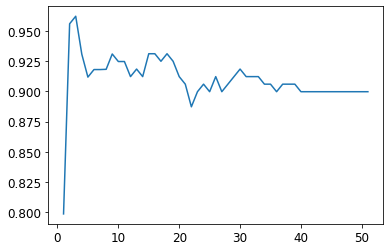

In [391]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [392]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [393]:
lr_rfecv_model=clf_lr.fit(x_train_rfecv,y_train.values.ravel())
coeff = pd.DataFrame(lr_rfecv_model.coef_, columns = x_train.columns[rfecv.support_])
coeff

,transformation,penalite_transfo,essais
0,1.864946,2.191166,2.867056


In [394]:
generate_accuracy_and_heatmapr(lr_rfecv_model,x_test_rfecv,y_test)

Accurarcy is:  0.9240506329113924
F1 score is:  0.9142857142857143


Actual      0   1
Predicted        
0          41   5
1           1  32


1

## Deuxième modélisation avec Forest

In [395]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train,y_train.values.ravel())

In [396]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test,y_test)

Accurarcy is:  0.8607594936708861
F1 score is:  0.8533333333333334


Actual      0   1
Predicted        
0          36   5
1           6  32


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [397]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train_rfecv,y_train.values.ravel())

In [398]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test_rfecv,y_test)

Accurarcy is:  0.9113924050632911
F1 score is:  0.9066666666666667


Actual      0   1
Predicted        
0          38   3
1           4  34


1

# Facteurs de victoire sans les facteurs de points (relatif)

In [399]:
df_reg_log.columns

Index(['victoire', 'points', 'tl_porte', 'tl_defenseurs_battus', 'tl_metres',
       'tl_plaquages_manques', 'tl_passe_apres_contact', 'tl_pen_cons',
       'tl_plaquages', 'tq_porte', 'tq_defenseurs_battus', 'tq_metres',
       'tq_plaquages_manques', 'tq_passe_apres_contact', 'tq_pen_cons',
       'tq_plaquages', 'balles_porte', 'franchissement', 'transformation',
       'defenseurs_battus', 'cdd_porte', 'cdd_defenseurs_battus', 'cdd_metres',
       'cdd_plaquages_manques', 'cdd_passe_apres_contact', 'cdd_pen_cons',
       'cdd_plaquages', 'jeu_au_pied', 'metres', 'palquages_manques',
       'passes_apres_contact', 'passes', 'penalite_transfo', 'pen_def',
       'pen_off', 'plaquages', 'lance_perdu', 'lance_gagne', 'essais',
       'turnover_cons', 'turnover_acquis', 'melee', 'ratio_melee',
       'ratio_touche', 'rucks', 'ratio_rucks', 'temps_possession_s',
       'temps_jeu_eff_s', 'nb_paricipant_ruck_off', 'nb_participant_ruck_def',
       'efficacite_participant_ruck', 'pen_cons_

## premiere modelisation LogisiticRegression

In [400]:
X = df_reg_log.loc[:,df_reg_log.columns != target].drop(["points","essais",'transformation',"penalite_transfo","temps_jeu_eff_s"], axis = 1)
names = X.columns
Y = df_reg_log.loc[:,df_reg_log.columns == target]

In [401]:
X.shape

(238, 47)

In [402]:
Y.shape

(238, 1)

In [403]:
X_premiere_modelisation = preprocessing.scale(X)
X_premiere_modelisation = pd.DataFrame(X_premiere_modelisation, columns = names)

In [404]:
x_train,x_test,y_train,y_test = train_test_split(X_premiere_modelisation,Y,test_size = 0.33, random_state = 8)

In [405]:
x_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [406]:
clf_lr= LogisticRegression()
lr_baseline_model= clf_lr.fit(x_train,y_train.values.ravel())
lr_baseline_model.coef_

array([[-0.41592343, -0.48354747, -0.08439348, -0.22374186,  0.07586941,
         0.42644699,  0.28186863,  0.3296726 ,  0.21836701,  0.52368417,
        -0.15752897, -0.3158007 , -0.51758806,  0.33111714,  0.07046112,
         1.15381095,  0.04136011,  0.10040664,  0.12924102,  0.26898581,
         0.22771724,  0.29958682, -1.4695477 ,  0.10926687,  0.87900167,
         0.41230684, -0.04136011, -0.06446724,  0.78178783, -0.23408603,
        -0.54891035,  0.53175533, -0.20362947,  0.32536711, -1.60253619,
         0.60057387,  0.93738414, -0.0454003 ,  0.31436369,  0.06623757,
         1.18533255,  0.66058122, -0.3725496 ,  0.83018776, -0.16956227,
         0.1610768 ,  0.98147315]])

In [407]:
generate_accuracy_and_heatmapr(lr_baseline_model,x_test,y_test)

Accurarcy is:  0.8481012658227848
F1 score is:  0.8285714285714285


Actual      0   1
Predicted        
0          38   8
1           4  29


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [408]:
rfecv = RFECV(estimator=clf_lr,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train,y_train.values.ravel())
print ("optimal number of features: ",rfecv.n_features_)
print ("Best features: ", x_train.columns[rfecv.support_])

optimal number of features:  26
Best features:  Index(['tl_porte', 'tl_defenseurs_battus', 'tl_plaquages_manques',
       'tl_pen_cons', 'tq_metres', 'tq_plaquages_manques', 'tq_pen_cons',
       'tq_plaquages', 'franchissement', 'cdd_passe_apres_contact',
       'cdd_pen_cons', 'jeu_au_pied', 'metres', 'passes', 'pen_off',
       'plaquages', 'lance_gagne', 'turnover_cons', 'turnover_acquis', 'melee',
       'ratio_touche', 'ratio_rucks', 'temps_possession_s',
       'nb_paricipant_ruck_off', 'nb_participant_ruck_def', 'ratio_transfo'],
      dtype='object')


In [409]:
rfecv.grid_scores_

array([0.73548387, 0.76774194, 0.81169355, 0.79294355, 0.83024194,
       0.84959677, 0.83669355, 0.86209677, 0.83689516, 0.82419355,
       0.83709677, 0.82439516, 0.84314516, 0.83044355, 0.83064516,
       0.84294355, 0.83669355, 0.84294355, 0.84294355, 0.84919355,
       0.84939516, 0.84919355, 0.84939516, 0.85584677, 0.86814516,
       0.86834677, 0.86229839, 0.85604839, 0.85604839, 0.85604839,
       0.85604839, 0.85604839, 0.85604839, 0.84959677, 0.84959677,
       0.84959677, 0.84959677, 0.84959677, 0.84959677, 0.84959677,
       0.84959677, 0.84959677, 0.84959677, 0.84959677, 0.84959677,
       0.84959677, 0.84959677])

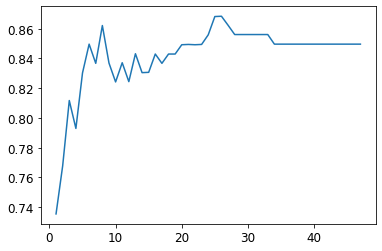

In [410]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [411]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [412]:
lr_rfecv_model=clf_lr.fit(x_train_rfecv,y_train.values.ravel())
coeff = pd.DataFrame(lr_rfecv_model.coef_, columns = x_train.columns[rfecv.support_])
coeff.rename(columns={'tl_porte':'Balles portées TL', 'tl_defenseurs_battus':"Défenseurs battus TL",
                      'tl_plaquages_manques':"Plaquages manqués TL",'tl_pen_cons':"Pénalités concédées TL",
                      'tq_metres':"Mètres fait TQ", 'tq_plaquages_manques':"Plaquages manqués TQ",
                      'tq_pen_cons':"Pénalités conscédées TQ",'tq_plaquages':"Plaquages TQ",
                      'franchissement':"Franchissement", 'cdd_passe_apres_contact':"Passe après contact CDD",
                      'cdd_pen_cons':"Pénalités concédées CDD", 'jeu_au_pied':"Jeu au pied",'metres':"Mètres",
                      'passes':"Passes", 'pen_off':"Pénailtés offensives",'plaquages':"Plaquages",
                      'lance_gagne':"Lancés gagnés", 'turnover_cons':"Trunovers concédés",
                      'turnover_acquis':"Turnovers acquis", 'melee':"Mêlées",'ratio_touche':"Ratio touche",
                      'ratio_rucks':"Ratio rucks", 'temps_possession_s':"Temps de possession",
                      'nb_paricipant_ruck_off':"Nombre de participants aux rucks offensifs",
                      'nb_participant_ruck_def':"Nombre de particpants aux rucks défensifs",
                      'ratio_transfo':"Ratio transformation"},inplace =True)
coeff= coeff.T.reset_index()
coeff.columns=["variables","valeurs"]

In [413]:
generate_accuracy_and_heatmapr(lr_rfecv_model,x_test_rfecv,y_test)

Accurarcy is:  0.8354430379746836
F1 score is:  0.8115942028985507


Actual      0   1
Predicted        
0          38   9
1           4  28


1

In [414]:
fig = go.Figure()
fig = px.bar(coeff.sort_values("valeurs"),x="valeurs", y="variables", orientation='h')
fig.update_layout(
    title={
        'text': "Valeurs des coefficients des facteurs majeurs d'une voctoire en top14",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Valeurs du coefficients",
    yaxis_title="Variables")
fig.show()

## Deuxième modélisation avec Forest

In [415]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train,y_train.values.ravel())

In [416]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test,y_test)

Accurarcy is:  0.6835443037974683
F1 score is:  0.6575342465753425


Actual      0   1
Predicted        
0          30  13
1          12  24


1

## Amélioration RFECV (recursive feature elimination with cross validation)

In [417]:
clf_rfr= RandomForestClassifier()
rfr_baseline_model= clf_rfr.fit(x_train_rfecv,y_train.values.ravel())

In [418]:
generate_accuracy_and_heatmapr(rfr_baseline_model,x_test_rfecv,y_test)

Accurarcy is:  0.7341772151898734
F1 score is:  0.7042253521126761


Actual      0   1
Predicted        
0          33  12
1           9  25


1

# Essai par type  4

### base

In [419]:
# selection des donnée : Y=victoire X données
X = df_reg_log_type4.loc[:,df_reg_log_type4.columns != target]
names = X.columns
Y = df_reg_log_type4.loc[:,df_reg_log_type4.columns == target]

In [420]:
X.shape

(17, 52)

In [421]:
Y.shape

(17, 1)

In [422]:
# graphique de corrélation
categorical_feature_columns = list(set(df_reg_log_type4.columns)-set(df_reg_log_type4._get_numeric_data().columns))
numerical_feature_columns = list(df_reg_log_type4._get_numeric_data().columns)
graphcorr = False 
if graphcorr==True:
    k= 53
    cols = df_reg_log_type4[numerical_feature_columns].corr().nlargest(k,target)[target].index
    cm = df_reg_log_type4[cols].corr()
    plt.figure(figsize= (50,25))
    sns.heatmap(cm,annot=True,cmap='viridis')

In [423]:
# centrage réduction
X_premiere_modelisation = preprocessing.scale(X)
X_premiere_modelisation = pd.DataFrame(X_premiere_modelisation, columns = names)

In [424]:
#split train et test
x_train = X_premiere_modelisation.copy().reset_index(drop =True)
x_test = X_premiere_modelisation.copy().reset_index(drop =True)
y_train = Y.copy().reset_index(drop =True)
y_test = Y.copy().reset_index(drop =True)


In [425]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regression = regressor.fit(x_train, y_train.values.ravel())


### reg basique

In [426]:
clf_lr= LogisticRegression()
lr_baseline_model= clf_lr.fit(x_train,y_train.values.ravel())
generate_accuracy_and_heatmapr(lr_baseline_model,x_test,y_test)

Accurarcy is:  1.0
F1 score is:  1.0


Actual     0   1
Predicted       
0          7   0
1          0  10


1

### reg rfecv (+logit backward)

In [427]:
rfecv = RFECV(estimator=clf_lr,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train,y_train.values.ravel())
print ("optimal number of features: ",rfecv.n_features_)
print ("Best features: ", x_train.columns[rfecv.support_])

optimal number of features:  18
Best features:  Index(['points', 'tl_defenseurs_battus', 'tl_plaquages_manques', 'tl_pen_cons',
       'tq_plaquages_manques', 'franchissement', 'transformation',
       'cdd_plaquages_manques', 'jeu_au_pied', 'palquages_manques',
       'penalite_transfo', 'pen_off', 'lance_gagne', 'essais',
       'turnover_acquis', 'temps_possession_s', 'nb_paricipant_ruck_off',
       'efficacite_participant_ruck'],
      dtype='object')


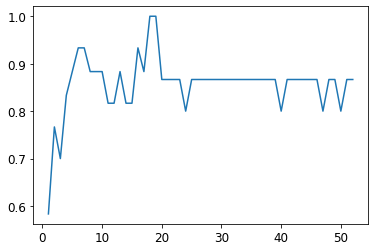

In [428]:
# graphique score rfecv
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [429]:
#transfo des données par rapport au rfecv
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [430]:
#test du model
lr_rfecv_model=clf_lr.fit(x_train_rfecv,y_train.values.ravel())
generate_accuracy_and_heatmapr(lr_rfecv_model,x_test_rfecv,y_test)

Accurarcy is:  1.0
F1 score is:  1.0


Actual     0   1
Predicted       
0          7   0
1          0  10


1

In [431]:
# prepa des données pour le logit
x_train_logit = pd.DataFrame(x_train_rfecv, columns= x_train.columns[rfecv.support_] )
x_test_logit = pd.DataFrame(x_test_rfecv, columns=  x_train.columns[rfecv.support_])
y_train.reset_index(drop=True, inplace = True)
y_test.reset_index(drop=True, inplace = True)

In [432]:
#logit pour connaitre les variables significatives et le pourcentage de variances expliqués
logit_model=sm.Logit(y_train,x_train_logit)
result=logit_model.fit(method= 'basinhopping')
print(result.summary2())

basinhopping step 0: f 1.08751e-05
basinhopping step 1: f 8.86626e-06 trial_f 8.86626e-06 accepted 1  lowest_f 8.86626e-06
found new global minimum on step 1 with function value 8.86626e-06
basinhopping step 2: f 5.8061e-06 trial_f 5.8061e-06 accepted 1  lowest_f 5.8061e-06
found new global minimum on step 2 with function value 5.8061e-06
basinhopping step 3: f 6.91963e-06 trial_f 6.91963e-06 accepted 1  lowest_f 5.8061e-06
basinhopping step 4: f 8.11129e-06 trial_f 8.11129e-06 accepted 1  lowest_f 5.8061e-06
basinhopping step 5: f 8.45785e-06 trial_f 8.45785e-06 accepted 1  lowest_f 5.8061e-06
basinhopping step 6: f 4.09437e-06 trial_f 4.09437e-06 accepted 1  lowest_f 4.09437e-06
found new global minimum on step 6 with function value 4.09437e-06
basinhopping step 7: f 4.9658e-06 trial_f 4.9658e-06 accepted 1  lowest_f 4.09437e-06
basinhopping step 8: f 7.86278e-06 trial_f 7.86278e-06 accepted 1  lowest_f 4.09437e-06
basinhopping step 9: f 9.03141e-06 trial_f 9.03141e-06 accepted 1  lo

                           Results: Logit
Model:                Logit            Pseudo R-squared: 1.000      
Dependent Variable:   victoire         AIC:              32.0000    
Date:                 2020-12-01 15:50 BIC:              45.3314    
No. Observations:     17               Log-Likelihood:   -5.4640e-06
Df Model:             15               LL-Null:          -11.517    
Df Residuals:         1                LLR p-value:      0.083404   
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       100.0000                                      
--------------------------------------------------------------------
                             Coef.  Std.Err.  z  P>|z| [0.025 0.975]
--------------------------------------------------------------------
points                       6.6882      nan nan   nan    nan    nan
tl_defenseurs_battus        -4.8854      nan nan   nan    nan    nan
tl_plaquages_manques        -7.5551      nan nan   nan    nan

E:\Python\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



In [433]:
backward = False 
if backward ==True :
    x_train_logit_b = x_train_logit.drop([""],axis=1)
    logit_model=sm.Logit(y_train,x_train_logit_b)
    result=logit_model.fit()
    print(result.summary2())

In [434]:
if backward == True :
    x_test_logit_b = x_test_logit.drop
    lr_rfecv_logit_model=clf_lr.fit(x_train_logit_b,y_train.values.ravel())
    generate_accuracy_and_heatmapr(lr_rfecv_model,x_test_logit_b,y_test)

### reg rfe  (+logit backward)

In [435]:
rfe = RFE (estimator =clf_lr, step=1)
rfe = rfe.fit(x_train,y_train.values.ravel())

In [436]:
#selected_rfe_features = pd.DataFrame({"feature": list(x_train.columns),'ranking':rfe.ranking_})
#selected_rfe_features.sort_values(by='ranking')

In [437]:
x_train_rfe = rfe.transform(x_train)
x_train_rfe = pd.DataFrame (x_train_rfe, columns= x_train.columns[rfe.support_])
x_train_rfe.reset_index(inplace = True,drop=True)
x_test_rfe = rfe.transform(x_test)
x_test_rfe = pd.DataFrame (x_test_rfe, columns= x_train.columns[rfe.support_])

In [438]:
#logit initial
#backward
logit_model=sm.Logit(y_train,x_train_rfe)
result=logit_model.fit(method= 'basinhopping')
print(result.summary2())

basinhopping step 0: f 9.32088e-06
basinhopping step 1: f 4.35794e-06 trial_f 4.35794e-06 accepted 1  lowest_f 4.35794e-06
found new global minimum on step 1 with function value 4.35794e-06
basinhopping step 2: f 3.39944e-06 trial_f 3.39944e-06 accepted 1  lowest_f 3.39944e-06
found new global minimum on step 2 with function value 3.39944e-06
basinhopping step 3: f 3.40315e-06 trial_f 3.40315e-06 accepted 1  lowest_f 3.39944e-06
basinhopping step 4: f 2.89778e-06 trial_f 2.89778e-06 accepted 1  lowest_f 2.89778e-06
found new global minimum on step 4 with function value 2.89778e-06
basinhopping step 5: f 1.71973e-06 trial_f 1.71973e-06 accepted 1  lowest_f 1.71973e-06
found new global minimum on step 5 with function value 1.71973e-06
basinhopping step 6: f 2.30138e-06 trial_f 2.30138e-06 accepted 1  lowest_f 1.71973e-06
basinhopping step 7: f 2.45784e-06 trial_f 2.45784e-06 accepted 1  lowest_f 1.71973e-06
basinhopping step 8: f 2.68108e-06 trial_f 2.68108e-06 accepted 1  lowest_f 1.719

E:\Python\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



In [439]:
#backward
x_train_rfe_b =x_train_rfe.drop(["points","essais"],axis=1)
logit_model=sm.Logit(y_train,x_train_rfe_b)
result=logit_model.fit()
print(result.summary2())

PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
#efficacité de ma modélisation 
x_test_rfe_b = x_test_rfe.drop(["points","essais","lance_perdu","tq_defenseurs_battus",
                                "tq_plaquages","palquages_manques","tl_defenseurs_battus",
                                "turnover_acquis","temps_jeu_eff_s","ratio_transfo",
                                "penalite_transfo","jeu_au_pied","temps_possession_s","nb_paricipant_ruck_off",
                                "melee"],axis=1)
lr_rfe_logit_model=clf_lr.fit(x_train_rfe_b,y_train.values.ravel())
generate_accuracy_and_heatmapr(lr_rfe_logit_model,x_test_rfe_b,y_test)